# **FPR | AI DEVELOPMENT**

*16/12/22 - Rubén Martínez Sisó, Lucía Cárdenas Palacios, Luca Ventura Dos Santos, Robin Chaize, Enzo Cau*

---

# Table Of Contents
* [1. Introduction](#0)
* [2. Problem Definition](#0)
* [3. Prepare The Data](#0)
* [4. Data Understandind](#0)
* [5. First Iteration](#0)
* [6. Second Iteration](#0)
* [7. Third Iteration](#0)
* [8. Conclusions](#0)

# 1.    Introduction

This project consists of putting into practice our knowledge of Artificial Intelligence and adapt it to the current situation. The idea is to solve a data prediction problem on a real dataset, so that the necessary measures must be taken and the appropriate processes carried out to obtain an optimal and correct result.

During the development of the project, different prediction models will be used, but all of them applying the train-test split technique. This process consists of using four dataframes, two of them to train the model and the others to validate it. To train the model, it is taught that a certain combination of features corresponds to a particular answer, and this is repeated with many combinations. Then, the model is tested by giving it a combination of features and it has to predict on its own which answer corresponds to those features. The idea is that the model learns to relate the features to each other and, despite being shown combinations that it has not learned in the training phase, it is able to give an approximate answer for those features.

The project consists of several parts. First, the problem is described as we have decided to approach it. Then we do a data understanding, where we visualize and analyze the data in a general way and go through each of the columns to obtain new conclusions about the data. Finally, some iterations are performed where in each iteration the data is treated differently and a different model is used to train and validate the prediction obtained. The objective is that, for each iteration, the way in which the data are processed is improved and the results are optimized.

# 2.    Problem Definition

The self-sufficient EcoPark gym that is being developed can welcome all kinds of customers, from beginners who have never been to a gym before to elite athletes. The energy generated by the machines is used to supply electricity to the gym itself, so it is interesting to know whether a user is able to generate more or less electricity for the gym.

**OBJECTIVE** <br>
The idea is to create an artificial intelligence capable of predicting whether a user is in good fitness or not, based on their answers to a series of questions (like a questionnaire). This will be helpfull to know if that user is going to be of much help to generate electricity (in the case that he/she is in good physical condition) or, on the contrary, if he/she will not be of much benefit to the gym.

On the one hand, a database containing sufficient and varied responses is to be used so that, from these answers, the objective can be achieved. <br>

Dataset chosen: [Fitness Analysis](https://www.kaggle.com/datasets/nithilaa/fitness-analysis) <br>
This dataset includes the following questions and answers per row: <br>
1 - Timestamp <br>
2 - Name of the person attending the survey <br>
3 - Gender of the person attending the survey <br>
4 - Age of the person attending the survey <br>
5 - How important is an exercise to you on the scale of 1 to 5 <br>
6 - How do you describe your current level of fitness? - Perfect, Very good, Good, Average, Unfit <br>
7 - How often do you exercise? - Every day, 1 to 2 times a week, 2 to 3 times a week, 3 to 4 times a week, 5 to 6 times a week, never <br>
8 - What barriers, if any, prevent you from exercising more regularly? (Select all that applies) - I don't have enough time, I can't stay motivated, ill become too tired, I have an injury, I don't really enjoy exercising, I exercise regularly with no barriers <br>
9 - What forms of exercise do you currently participate in? (Select all that applies) - Walking or jogging, gym, swimming, yoga, Zumba dance, lifting weights, team sport, I don't really exercise <br>
10 - Do you exercise ? - Alone, With a friend, With a group, Within a class environment, I don't really exercise <br>
11 - What time of the day do you prefer to exercise? - Early morning, afternoon, evening <br>
12 - How long do you spend exercising per day? - 30 min, 1 hour, 2 hours, 3 hours and above, I don't really exercise <br>
13 - Would you say, you eat a healthy balanced diet? - Yes, No, Not always <br>
14 - What prevents you from eating a healthy balanced diet, if any? (Select all that applies) - Lack of time, Cost, Ease of access to fast food, Temptation, and cravings, I have a balanced diet <br>
15 - How healthy do you consider yourself on a scale of 1 to 5? <br>
16 - Have you recommended your friends to follow a fitness routine? - Yes, No <br>
17 - Have you ever purchased fitness equipment? - Yes, No <br>
18 - What motivates you to exercise? (Select all that applies) - I want to be fit, I want to increase muscle mass and strength, I want to lose weight, I want to be flexible, I want to relieve stress, I want to achieve a sporting goal, I'm not really interested in exercising. <br>

The answer that will be predicted from the rest will be number 6: `How do you describe your current level of fitness?` In this way, it will be possible to predict whether the user is in a good physical condition or not. It should be noted that this column has five possible answers (Perfect, Very good, Good, Average or Unfit), but from the beginning it will be simplified to three possible answers in order to simplify the problem and better balance the answers.

On the other hand, it will be a programme developed in Python and and ipynb format (IPython Notebook, Jupyter), where we will use libraries such as [pandas](https://pandas.pydata.org/) and [sklearn](https://www.analyticsvidhya.com/blog/2015/01/scikit-learn-python-machine-learning-tool/). The last one is the best tool to use machine learning algorithms and choose the best one. 


# 3.    Prepare The Data 

## 3.1  Dependencies

In [301]:
# %pip install pd
# %pip install matplotlib
# %pip install plotly
# %pip install numpy
# %pip install requests
# %pip install seaborn
# %pip install torch
# %pip install numpy

In [302]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as numpy

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from os import sep
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy_score
from sklearn.metrics import confusion_matrix as confusion_matrix

## 3.2  Data Loading

Using the Pandas library, the dataset can be stored in a "variable" and edited as desired.

In [303]:
PATH_DATA_RAW = 'data_fitness' + sep + 'raw' + sep
fitness_raw = pd.read_csv(PATH_DATA_RAW + 'fitness analysis.csv')
pd.DataFrame()

""


## 3.3  Fitness Simplification

As already mentioned, before any analysis or modification of the dataset, the `How do you describe your current level of fitness?` column will be simplified to balance the data and obtain better results.

In [304]:
fitness_raw['How do you describe your current level of fitness ?'].value_counts()

Good         220
Average      195
Unfit         54
Very good     53
Perfect       23
Name: How do you describe your current level of fitness ?, dtype: int64

In [305]:
fitness_mod = fitness_raw.replace({'How do you describe your current level of fitness ?': {
    "Unfit": 0,
    "Average": 0,
    "Good": 1,
    "Very good": 2,
    "Perfect": 2}})
    
fitness_mod['How do you describe your current level of fitness ?'].value_counts()


0    249
1    220
2     76
Name: How do you describe your current level of fitness ?, dtype: int64

This way, the answers are organised more evenly. However, the number of fitness level 3 users is much lower than the other two. This is because the dataset is not balanced. This may negatively affect the prediction of the answer, but it will be treated correctly in order to make the most of the answers obtained. It should be noted that different combinations of simplification have been tried, but this is the one that has given the best results. 

# 4.    Data Understanding

## 4.1  First Look

In [306]:
fitness_mod.head()

,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,1,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,2,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,1,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,2019/07/04 5:43:35 AM GMT+5:30,Anusha,Female,15 to 18,4,1,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,2019/07/04 5:44:29 AM GMT+5:30,Nikkitha,Female,19 to 25,3,0,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit


As mentioned, the dataset contains 18 different columns, one of which is the attribute to be predicted. At first glance, the dataset does not present any major anomalies. The only notable features is that most of the columns do not contain numerical values and some contain very long answers. This can be a problem as the sklearn library **only works with numeric values**, so the columns will have to be adapted to work with the AI.

In [307]:
fitness_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 18 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   Timestamp                                                                                                              545 non-null    object
 1   Your name                                                                                                              545 non-null    object
 2   Your gender                                                                                                            545 non-null    object
 3   Your age                                                                                                               545 non-null    object
 4   How impo

In [308]:
fitness_mod.isna().sum()

Timestamp                                                                                                                0
Your name                                                                                                                0
Your gender                                                                                                              0
Your age                                                                                                                 0
How important is exercise to you ?                                                                                       0
How do you describe your current level of fitness ?                                                                      0
How often do you exercise?                                                                                               0
What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)              0
What form(s) of 

On the other hand, the dataset does not contain any null values (that is, there are no unanswered questions in any row). This is a very common problem when dealing with databases, but in this case this kind of treatment can be omitted.

## 4.2  Column Display

Each column has different characteristics and content, so it is necessary to have a small insight into the behaviour of each column and to better understand the information provided by the dataset.

### 4.2.1   Timestamp

In [309]:
fitness_mod['Timestamp'].value_counts()

2019/07/03 11:48:07 PM GMT+5:30    1
2019/07/05 12:56:33 PM GMT+5:30    1
2019/07/05 12:38:18 PM GMT+5:30    1
2019/07/05 12:39:55 PM GMT+5:30    1
2019/07/05 12:39:57 PM GMT+5:30    1
                                  ..
2019/07/04 12:59:58 PM GMT+5:30    1
2019/07/04 12:59:24 PM GMT+5:30    1
2019/07/04 12:59:20 PM GMT+5:30    1
2019/07/04 12:56:01 PM GMT+5:30    1
2019/07/21 8:54:46 PM GMT+5:30     1
Name: Timestamp, Length: 545, dtype: int64

Column type: open answer, not numeric. <br>
This is only the date and time at which each row has been processed. All values are different, not relevant for the AI.

### 4.2.2   Name of the person attending the survey

In [310]:
fitness_mod['Your name '].value_counts()

Kousi           4
Murali          3
Priya           3
Sanjana         3
Rajesh          2
               ..
Manoji K        1
Sanjita         1
Cutie           1
Rhea            1
Mary Presley    1
Name: Your name , Length: 517, dtype: int64

Column type: open answer, not numeric. <br>
Here is a list of names of those who took part in the questionnaire and gave their answers. All values are different (with the exception of some repeated names), not relevant for the AI.

### 4.2.3   Gender of the person attending the survey

Female    302
Male      243
Name: Your gender , dtype: int64

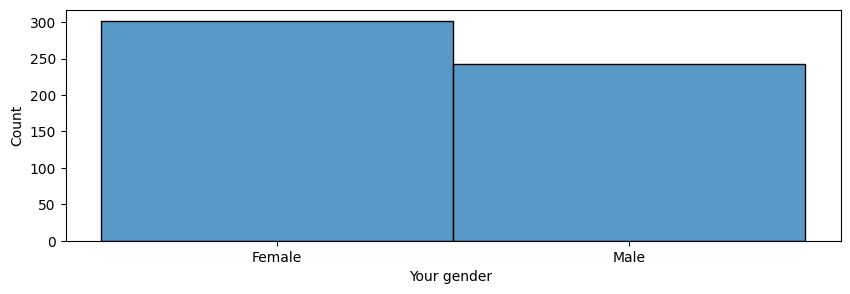

In [311]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'Your gender ')
fitness_mod['Your gender '].value_counts()

Column type: single answer multiple choice, non-numeric. <br>
It is differentiated whether the user is male or female. The answers are slightly balanced and may be relevant for AI.

### 4.2.4   Age of the person attending the survey

19 to 25        236
15 to 18        167
40 and above     85
30 to 40         37
26 to 30         20
Name: Your age , dtype: int64

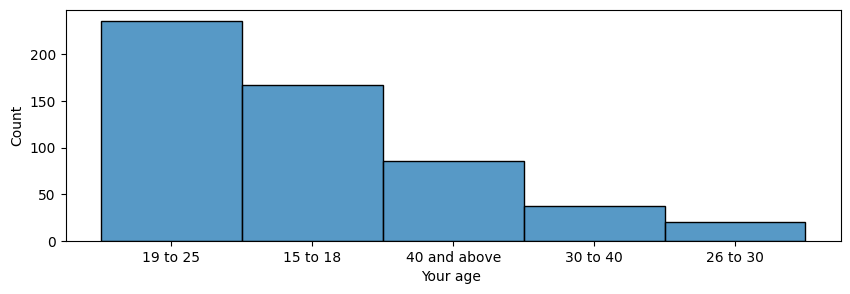

In [312]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'Your age ')
fitness_mod['Your age '].value_counts()

Column type: single answer multiple choice, non-numeric. <br>
The age of the participant is determined using different age ranges. The answers are not balanced, with users aged between 19 and 25 predominating. Despite this, there is a large amount of data and it may be relevant for AI.

### 4.2.5   How important is an exercise to you on the scale of 1 to 5

5    181
4    174
3    144
2     38
1      8
Name: How important is exercise to you ?, dtype: int64

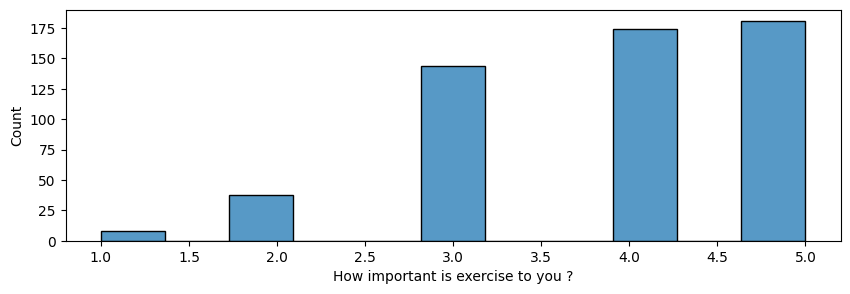

In [313]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'How important is exercise to you ?')
fitness_mod['How important is exercise to you ?'].value_counts()

Column type: single answer multiple choice, numeric. <br>
Each user describes how important exercise is for him/her. The answers are not balanced for some cases, but it is related to the target answer and may be relevant to the AI. 

### 4.2.6   How do you describe your current level of fitness?

0    249
1    220
2     76
Name: How do you describe your current level of fitness ?, dtype: int64

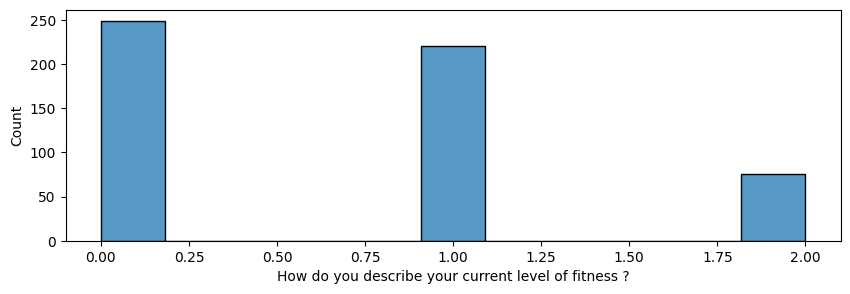

In [314]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'How do you describe your current level of fitness ?')
fitness_mod['How do you describe your current level of fitness ?'].value_counts()

Column type: single answer multiple choice, numeric. <br>
This is the target answer: the AI will predict what the answer to this question would be based on the rest of the answers from the same user. As mentioned above, the answers are not quite balanced and the least predominant answer is 3, so it is very likely that the machine will be wrong in predicting fitness level 3.

### 4.2.7   How often do you exercise?

1 to 2 times a week    148
Never                  124
2 to 3 times a week     78
3 to 4 times a week     77
Everyday                69
5 to 6 times a week     49
Name: How often do you exercise?, dtype: int64

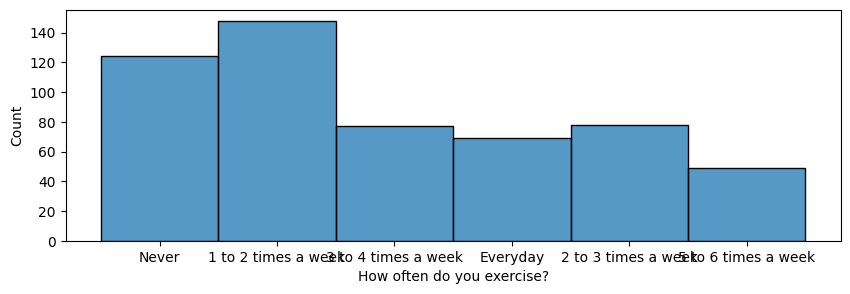

In [315]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'How often do you exercise?')
fitness_mod['How often do you exercise?'].value_counts()

Column type: single answer multiple choice, non-numerical. <br>
Approximately the number of times the participant exercises per week is determined. The answers are slightly balanced and is information that may be relevant for AI.

### 4.2.8   What barriers, if any, prevent you from exercising more regularly?

In [316]:
fitness_mod['What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)'].value_counts()

I don't have enough time                                                                                       160
I can't stay motivated                                                                                          74
I exercise regularly with no barriers                                                                           60
I don't have enough time;I can't stay motivated                                                                 52
I'll become too tired                                                                                           42
I don't really enjoy exercising                                                                                 25
I don't have enough time;I'll become too tired                                                                  25
I have an injury                                                                                                12
I don't have enough time;I can't stay motivated;I'll become too tired           

Column type: multiple choice, not numerical. <br>
Here the user has to choose the options with which he/she most identifies, in this case, about the situations that prevent him/her from exercising. Although it is information related to the target answer, there are too many possible combinations of options and no adequate treatment can be applied to adapt it to the needs of the AI. It could be relevant information for AI but difficult to use.

### 4.2.9   What forms of exercise do you currently participate in?

In [317]:
fitness_mod['What form(s) of exercise do you currently participate in ?                        (Please select all that apply)'].value_counts()

Walking or jogging                                                             153
I don't really exercise                                                         77
Gym                                                                             44
Walking or jogging;Yoga                                                         26
Walking or jogging;Gym                                                          26
Team sport                                                                      26
Walking or jogging;Team sport                                                   25
Yoga                                                                            25
Walking or jogging;Gym;Lifting weights                                          13
Walking or jogging;I don't really exercise                                      10
Gym;Team sport                                                                   9
Zumba dance                                                                      9
Walk

Column type: multiple choice, not numerical. <br>
The participant has to select the options related to the sport(s) he/she plays. As in the previous case, there are too many possible combinations of options and no adequate treatment can be applied to adapt it to the needs of the AI. It could be relevant information for AI but difficult to use.

### 4.2.10   Do you exercise... ?

Alone                         289
I don't really exercise        89
With a friend                  85
With a group                   66
Within a class environment     16
Name: Do you exercise ___________ ?, dtype: int64

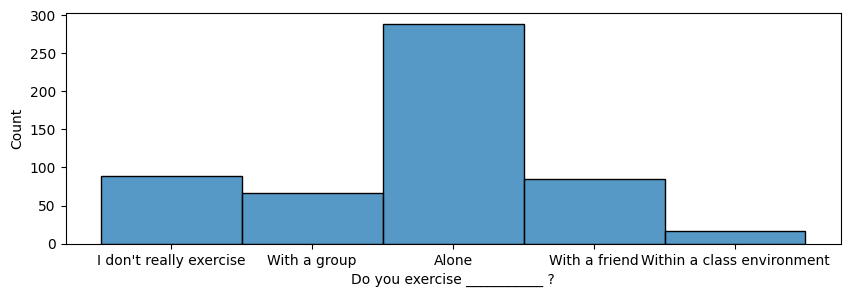

In [318]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'Do you exercise ___________ ?')
fitness_mod['Do you exercise ___________ ?'].value_counts()

Column type: single answer multiple choice, non-numeric. <br>
This determines the company with which the user plays sport. Some answers are more balanced than others, with the Alone option being the most prominent. Despite this, there is a large amount of data and it may be relevant for the AI.

### 4.2.11  What time of the day do you prefer to exercise?

Early morning    300
Evening          235
Afternoon         10
Name: What time if the day do you prefer to exercise?, dtype: int64

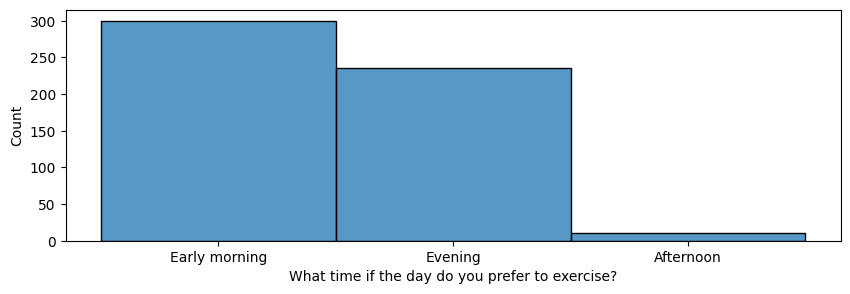

In [319]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'What time if the day do you prefer to exercise?')
fitness_mod['What time if the day do you prefer to exercise?'].value_counts()

Column type: single answer multiple choice, non-numeric. <br>
Each user chooses their favourite time of day to exercise. Surprisingly few users have chosen the "Afternoon" option but, nevertheless, it may be relevant information for the AI. 

### 4.2.12  How long do you spend exercising per day?

30 minutes                 203
1 hour                     167
I don't really exercise    105
2 hours                     64
3 hours and above            6
Name: How long do you spend exercising per day ?, dtype: int64

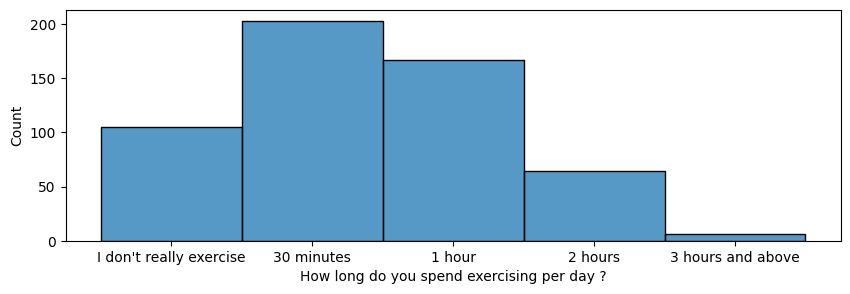

In [320]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'How long do you spend exercising per day ?')
fitness_mod['How long do you spend exercising per day ?'].value_counts()

Column type: single answer multiple choice, non-numeric. <br>
It determines how long the user's training session lasts approximately. The average is "30 minutes", with "3 hours and above" being the least frequent answer. The question is related to the target answer and may be relevant to AI. 

### 4.2.13  Would you say, you eat a healthy balanced diet?

Not always    327
Yes           115
No            103
Name: Would you say you eat a healthy balanced diet ?, dtype: int64

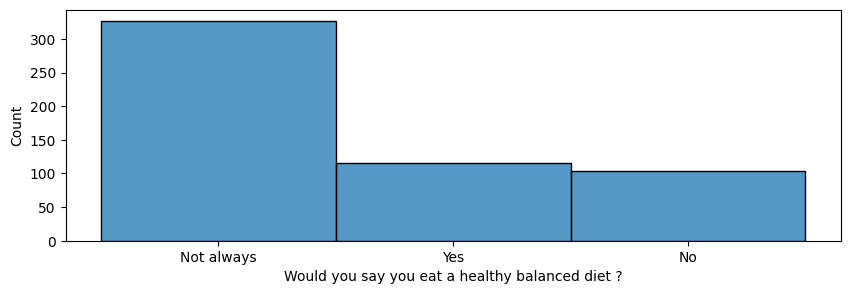

In [321]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'Would you say you eat a healthy balanced diet ?')
fitness_mod['Would you say you eat a healthy balanced diet ?'].value_counts()

Column type: single answer multiple choice, non-numeric. <br>
Here the user states whether he/she considers that he/she has a balanced diet or not. It is clear that the answer "Not always" is the most common, the rest are balanced. This is relevant information for the functioning of the AI.

### 4.2.14  What prevents you from eating a healthy balanced diet, if any?

In [322]:
fitness_mod['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'].value_counts()

Temptation and cravings                                                  210
Lack of time                                                              88
Ease of access to fast food;Temptation and cravings                       76
Ease of access to fast food                                               56
I have a balanced diet                                                    42
Lack of time;Temptation and cravings                                      15
Cost                                                                      13
Lack of time;Ease of access to fast food;Temptation and cravings          10
Lack of time;Ease of access to fast food                                   9
Cost;Ease of access to fast food                                           6
Lack of time;Cost                                                          5
Cost;Ease of access to fast food;Temptation and cravings                   2
Lack of time;Cost;Ease of access to fast food;Temptation and cravings      2

Type of column: multiple choice, not numerical. <br>
The user has to choose the options with which he/she most identifies, in this case, about the situations that prevent him/her from eating a balanced diet. As with the other columns of this type, there are too many possible combinations of options and it is not possible to apply an adequate treatment to adapt it to the needs of the IA. It could be relevant information for AI but difficult to use.

### 4.2.15  How healthy do you consider yourself on a scale of 1 to 5?

3    301
4    151
2     48
5     32
1     13
Name: How healthy do you consider yourself?, dtype: int64

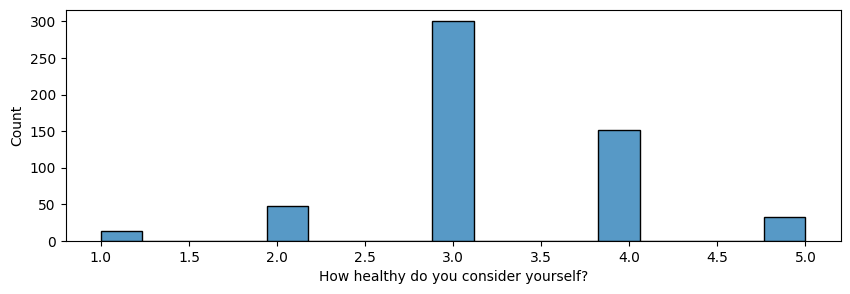

In [323]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'How healthy do you consider yourself?')
fitness_mod['How healthy do you consider yourself?'].value_counts()

Column type: single answer multiple choice, numeric. <br>
Each user describes how healthy they think they are overall. The answers are not really balanced, with answer 3 predominating over the rest, but it is related to the target answer and may be relevant to the AI. 

### 4.2.16  Have you recommended your friends to follow a fitness routine? 

Yes    351
No     194
Name: Have you ever recommended your friends to follow a fitness routine?, dtype: int64

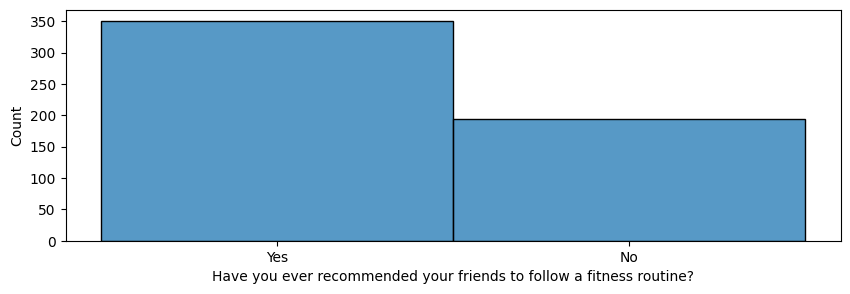

In [324]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'Have you ever recommended your friends to follow a fitness routine?')
fitness_mod['Have you ever recommended your friends to follow a fitness routine?'].value_counts()

Column type: single answer multiple choice, non-numerical. <br>
The participant states whether he/she has ever recommended sport routines to people close to him/her. Considering that there are only two answer options, it is difficult to keep the balance between these, but however there is not an exorbitant difference in the answers. The information may be relevant for the functioning of the AI. 

### 4.2.17  Have you ever purchased fitness equipment?

No     340
Yes    205
Name: Have you ever purchased a fitness equipment?, dtype: int64

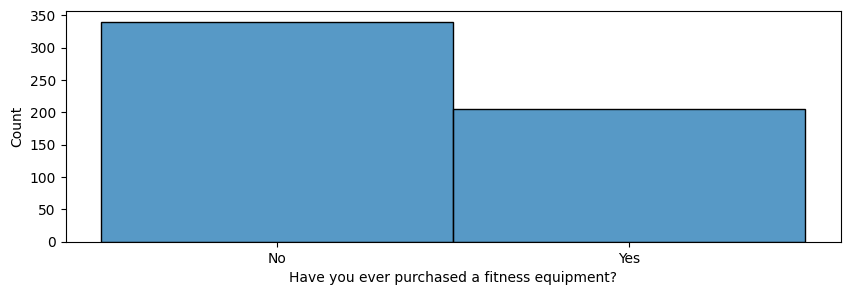

In [325]:
plt.figure(figsize=(10,3))
sns.histplot(data = fitness_mod, x = 'Have you ever purchased a fitness equipment?')
fitness_mod['Have you ever purchased a fitness equipment?'].value_counts()

Column type: single answer multiple choice, non-numerical. <br>
Here the participant defines whether he/she has ever purchased sports equipment of any kind. As in the previous case, it is difficult to keep the balance between two possible options, but however there is not an exorbitant difference in the answers. The information may be relevant for the functioning of the AI. 

### 4.2.18  What motivates you to exercise?

In [326]:
fitness_mod['What motivates you to exercise?         (Please select all that applies )'].value_counts()

I want to be fit                                                                                                        88
I want to be fit;I want to lose weight                                                                                  43
I want to lose weight                                                                                                   43
I'm sorry ... I'm not really interested in exercising                                                                   36
I want to relieve stress                                                                                                33
                                                                                                                        ..
I want to be fit;I want to think clearly and I want to play cricket with my grandkids                                    1
I want to increase muscle mass and strength;I want to achieve a sporting goal                                            1
I dont wanna gai

Tipo de columna: opción múltiple, no numérica. <br>
The user has to choose the options with which he/she feels most identified, in this case, about the situations that motivate him/her to exercise. As with the other columns of this type, there are too many possible combinations of options and it is not possible to apply a suitable treatment to adapt it to the needs of the AI. It could be relevant information for the AI but difficult to use.

## 4.3  Relevant Observations

* Most of the columns of the dataset are of the multiple choice type with a single, non-numerical answer, so that all of them will require a specific modification. In this way, the model used will be able to interpret the information and use it to predict the target answer. 
* Those multiple-choice columns with a single, numerical answer are the ones that require the least processing, as sklearn is able to interpret them correctly. On the other hand, they may require some adaptation or even elimination of the column itself if it negatively affects the prediction of the target answer.
* Multiple choice and non-numerical columns are the most difficult to treat, as one answer may imply other answers and, although some may be related, others may be problematic. The exact treatment to be applied is not determined but an attempt will be made to use the information anyway.
* Most graphs show an imbalance in the answers. For the model to work at its best, the dataset should have a balanced and abundant set of answers. Despite this, the AI will do its best to learn how to predict the target answer.

# 5.    First Iteration

In this first iteration, a basic data preparation will be applied to work with the data correctly and to get a first idea of how the model works. On the one hand, all columns with open and multiple choice answers will be removed to avoid problems. On the other hand, the rest of the columns are going to change all their string answers to numerical values so that they can be interpreted by the AI.

## 5.1  Data Preparation

### 5.1.1   Drop columns with open answers

Columns with open-ended answers are removed as there is no way to use this information. These answers are absolutely useless for prediction, as they do not contribute any information to the model and have no relation to the target answer.

In [327]:
fitness1_1 = fitness_mod.copy(deep = True)

fitness1_1 = fitness1_1.drop(['Timestamp'], axis=1)
fitness1_1 = fitness1_1.drop(['Your name '], axis=1)

### 5.1.2   Drop columns with multiple answers

These columns contain answers with different combinations of options, initially they will not be used as there are many unique and difficult answers to deal with.

In [328]:
fitness1_2 = fitness1_1.copy(deep = True)

fitness1_2 = fitness1_2.drop(['What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)'], axis=1)
fitness1_2 = fitness1_2.drop(['What form(s) of exercise do you currently participate in ?                        (Please select all that apply)'], axis=1)
fitness1_2 = fitness1_2.drop(['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'], axis=1)
fitness1_2 = fitness1_2.drop(['What motivates you to exercise?         (Please select all that applies )'], axis=1)

### 5.1.3  Change every string value to integer value

It does not matter what number value is assigned to each string, the important thing is that it is different from the rest of the answers and the model can differentiate between the different options. As mentioned above, this treatment applies only because the models cannot work with strings.

In [329]:
# "4. How important is an exercise to you on the scale of 1 to 5" with integer values
# "14. How healthy do you consider yourself on a scale of 1 to 5?" with integer values
# "5. How do you describe your current level of fitness?" replaced at the top of the project

fitness1_3 = fitness1_2.copy(deep = True)

fitness1_3 = fitness1_3.replace({'Your gender ': 
{"Female": 0,
"Male": 1}})

fitness1_3 = fitness1_3.replace({'Your age ': 
{"19 to 25": 0,
"15 to 18": 1,
"40 and above": 2,
"30 to 40": 3,
"26 to 30": 4}})

fitness1_3 = fitness1_3.replace({'How often do you exercise?': 
{"1 to 2 times a week": 0,
"Never": 1,
"2 to 3 times a week": 2,
"3 to 4 times a week": 3,
"Everyday": 4,
"5 to 6 times a week": 5}})

fitness1_3 = fitness1_3.replace({'Do you exercise ___________ ?': 
{"Alone": 0,
"I don't really exercise": 1,
"With a friend": 2,
"With a group": 3,
"Within a class environment": 4}})

fitness1_3 = fitness1_3.replace({'What time if the day do you prefer to exercise?': 
{"Early morning": 0,
"Evening": 1,
"Afternoon": 2}})

fitness1_3 = fitness1_3.replace({'How long do you spend exercising per day ?': 
{"30 minutes": 0,
"1 hour": 1, 
"I don't really exercise": 2, 
"2 hours": 3, 
"3 hours and above": 4}})

fitness1_3 = fitness1_3.replace({'Would you say you eat a healthy balanced diet ?': 
{"Not always": 0,
"Yes": 1,
"No": 2 }})

fitness1_3 = fitness1_3.replace({'Have you ever recommended your friends to follow a fitness routine?': 
{"Yes": 0,
"No": 1}})

fitness1_3 = fitness1_3.replace({'Have you ever purchased a fitness equipment?': 
{"Yes": 0,
"No": 1}})

### 5.1.4   Train-test Split

We sepparate the dataframe in 4 dataframes, two for train and two for test. "x" dataframes contain all columns of the database except the target column. The "y" dataframes contain only the column to be predicted. The test dataset has a 30% of the rows of the original dataset and the train dataset a 70% of them.

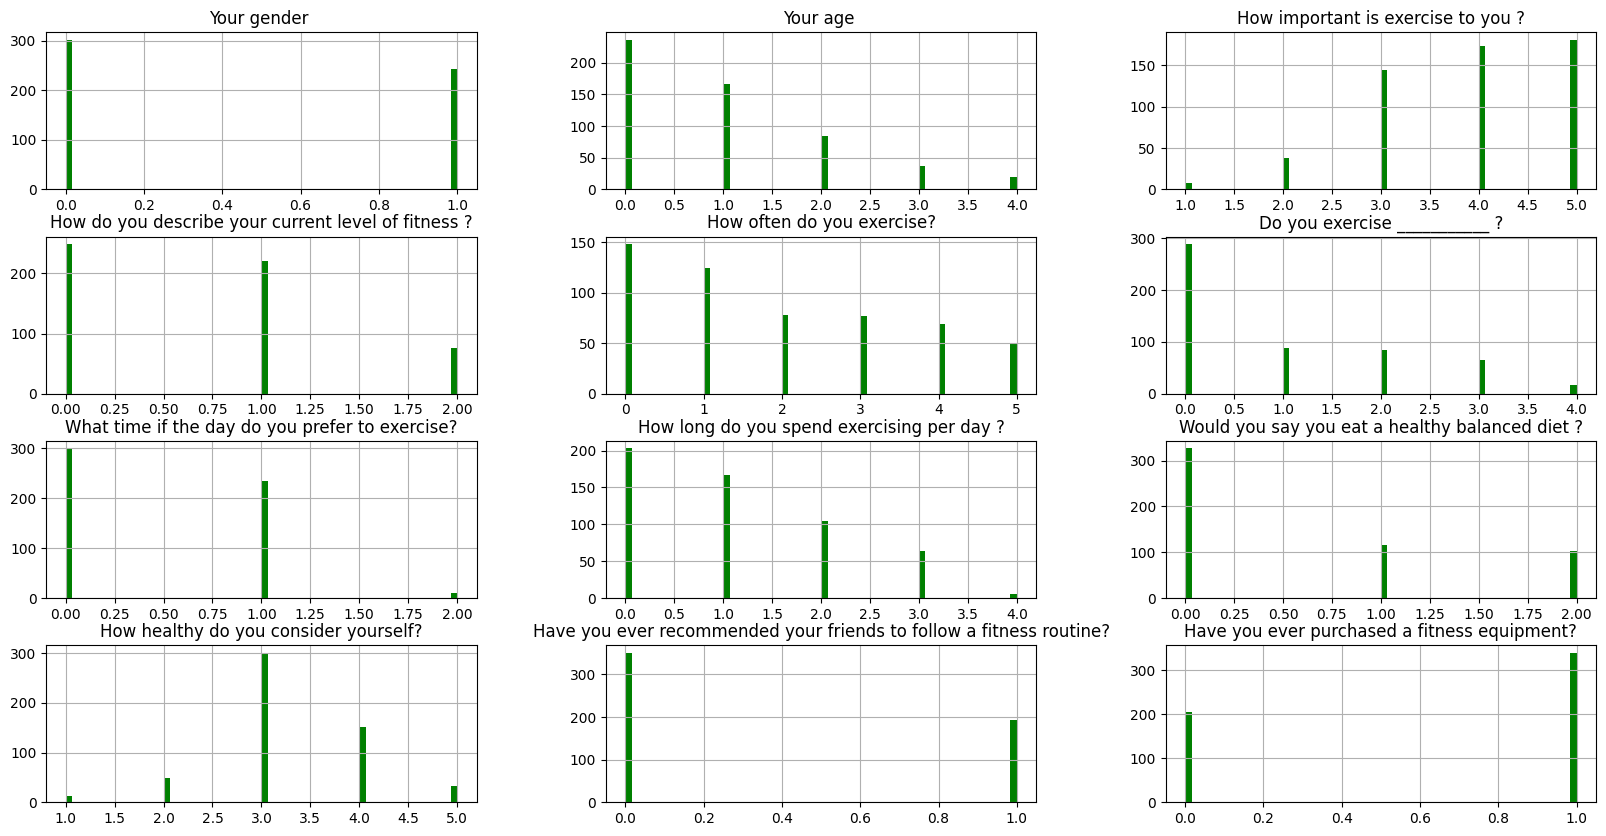

In [330]:
fitness1_3.hist(bins=60, figsize=(20,10), color='green')
plt.show()

Before separating the data, here is a final visualisation of the current situation of the dataset. Now that it has been simplified and the data is numerical, you can better appreciate the content of each column and how the different answers are distributed. 

In [331]:
x = fitness1_3.drop(['How do you describe your current level of fitness ?'], axis=1)
y = fitness1_3['How do you describe your current level of fitness ?']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

## 5.2  Modeling & Evaluation

### 5.2.1   Logistic Regression

Logistic regression is useful for cases where you want to predict the presence or absence of a characteristic or outcome based on the values of a set of predictors, similar to a linear regression model. This allows the analysis of the results in explanatory and predictive terms. It has been decided to use it because is a basic and useful analysis method for classification problems, it is very easy to realize and achieves a normal performance with linearly separable classes. It is an extensively employed algorithm for classification in industry.

First, the model is loaded with the desired parameters using the skalearn library; then the model is trained with both training dataframes (it learns that the answers of X_train correspond to the target answers of y_train); finally, the accuracy of the model is calculated, which corresponds to the percentage of correct answers it has predicted.

In [332]:
# lr = LogisticRegression(random_state=40)
lr = LogisticRegression(penalty = 'l2', C = 10, random_state = 40)
print(lr.get_params())

{'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 40, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [333]:
lr.fit(X_train,y_train)

C:\Users\ruben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, random_state=40)

In [334]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: {:d}%'.format(int(accuracy * 100)))

Accuracy: 57%


### 5.2.2  Performance Evaluation

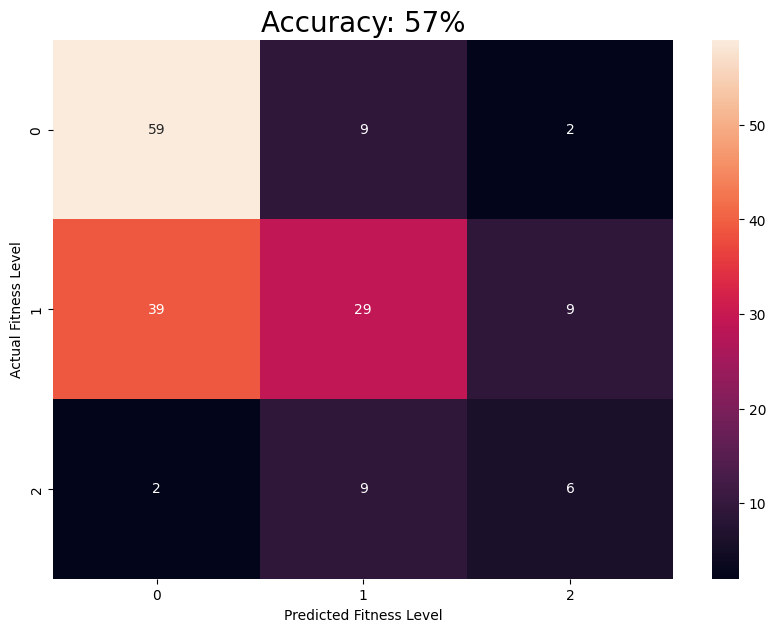

In [335]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.xlabel('Predicted Fitness Level')
plt.ylabel('Actual Fitness Level')
plt.title('Accuracy: {:d}%'.format(int(accuracy * 100)), size = 20)
plt.show()

As a metric we are using **accuracy** and a **confusion matrix** with the changes on the fitness level column, our target column. <br>

The accuracy achieved is relatively hight (57%), even though it can be imporived with a deeper data preparation, and a more adecuate model for our dataset (a 33.33% accuracy would mean that the model hasn't learned). Esto significa que en el 57% de los casos, el modelo predice el fitness level correcto a partir del resto de respuestas de las diferentes columnas.


In the confusion matrix we can see that there are quite a number of well predicted values, especially for fitness level 0. However, the model has some significant errors: it confuses many actual values 1 for 0 and there are very few accurate predictions of fitness level 2, the rest are more insignificant mistakes. It overpredicts the medium value 1, possibly due to underfitting, mainly on the values 1 and 2. Some possible errors affecting the score may be the lack of outliers removed or the fact that all features have been used in the model. In fact, for classification problems there are other types of models that may be better suited to our problem.

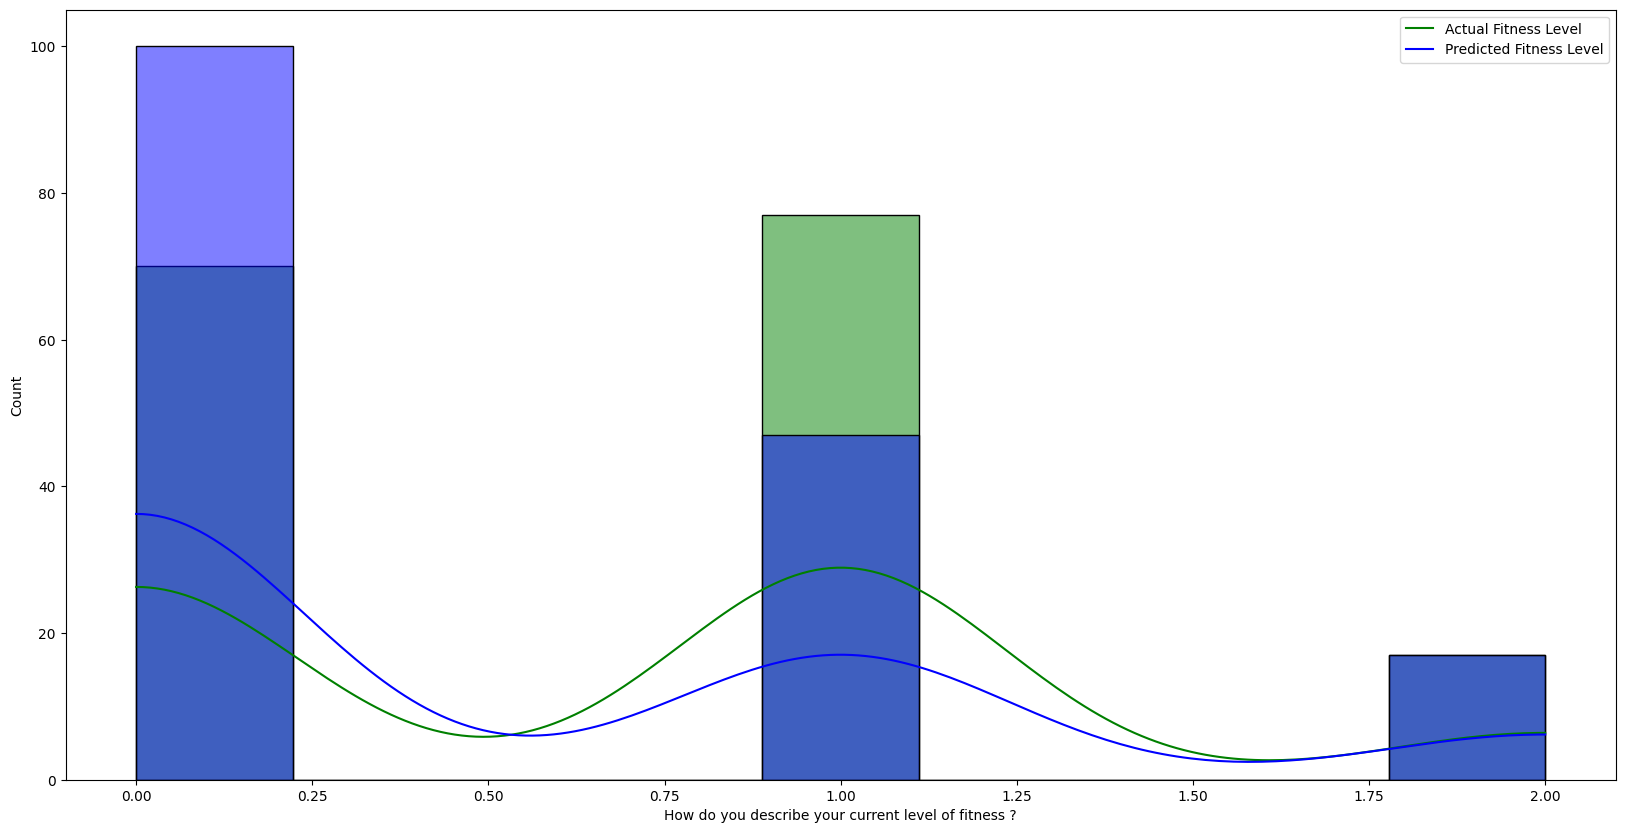

In [336]:
plt.figure(figsize=(20,10))
sns.histplot(data = y_test, kde = True, color='g')
sns.histplot(data = y_pred, kde = True, color='b')
plt.legend(labels=["Actual Fitness Level","Predicted Fitness Level"])

In this graph you can see in green the correct answers and in blue the answers predicted by the model. As the confusion matrix shows, the answers 0 and 1 are the most confused with each other.

## 5.3  Following Iteration

In the next iteration the aim is to improve the accuracy by reconsidering the way the data has been treated, as well as applying a different model that better fits the problem.

To get the most out of the dataset, we will try to use in some way those columns with multiple answers instead of simply eliminating them. In addition, outliers will be treated to try to get better results. The most important change would be to change the model used, so Decision Tree  model will be used, which are likely to be better suited to the current problem (a clasification one). Those changes should help the following models to learn in a better way.


# 6.    Second Iteration

## 6.1  Data Preparation

### 6.1.1   Drop columns with open answers

As in the previous iteration, columns with open-ended answers are removed as there is no way to use this information.

In [337]:
fitness2_1 = fitness_mod.copy(deep = True)

fitness2_1 = fitness2_1.drop(['Timestamp'], axis=1)
fitness2_1 = fitness2_1.drop(['Your name '], axis=1)

### 6.1.2   Treat columns with multiple answer

In [338]:
#fitness1_2 = fitness1_2.drop(['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'], axis=1)

fitness2_2 = fitness2_1.copy(deep = True)

fitness2_2 = fitness2_2.drop(['What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)'], axis=1)
fitness2_2 = fitness2_2.drop(['What form(s) of exercise do you currently participate in ?                        (Please select all that apply)'], axis=1)
fitness2_2 = fitness2_2.drop(['What motivates you to exercise?         (Please select all that applies )'], axis=1)

New in this iteration is one of the columns with multiple answers, specifically the question `What prevents you from eating a healthy balanced diet, If any?`. Similar answers will be grouped into the same numerical value, so that an approximate count of the answers will be made and the column can be used when training and training the model. The rest of the multiple answer columns are too large and are not accessible for processing.

In [339]:
fitness2_2 = fitness2_2.replace({'What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)': 
{"Temptation and cravings": 0,
 "Lack of time": 1,
  "Ease of access to fast food;Temptation and cravings": 3,
  "Ease of access to fast food": 3,
  "I have a balanced diet": 4,
  "Lack of time;Temptation and cravings": 1,
  "Cost": 5,
  "Lack of time;Ease of access to fast food;Temptation and cravings": 3,
  "Lack of time;Ease of access to fast food": 1,
  "Cost;Ease of access to fast food": 5,
  "Lack of time;Cost": 5,
  "Cost;Ease of access to fast food;Temptation and cravings": 3,
  "Lack of time;Cost;Ease of access to fast food;Temptation and cravings": 3,
  "Cost;Temptation and cravings": 5,
  "Ease of access to fast food;I have a balanced diet": 4,
  "I do not measure. I can't say for sure if my diet is balanced. ": 3,
  "Alcohol does me a good diet": 4,
  "Lack of time;Cost;Temptation and cravings": 3,
  "Rarely eat fast food": 4,
  "Temptation and cravings;I have a balanced diet": 4,
  "i don't have a proper diet": 3,
  "Social circle ": 4
  }})

fitness2_2['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'].value_counts()

0    210
3    149
1    112
4     48
5     26
Name: What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply), dtype: int64

### 6.1.3   Change every string value to integer value

As in the previous iteration, those columns with string answers and not yet processed replace their values by numeric values.

In [340]:
# "4. How important is an exercise to you on the scale of 1 to 5" with integer values
# "14. How healthy do you consider yourself on a scale of 1 to 5?" with integer values
# "5. How do you describe your current level of fitness?" replaced at the top of the project

fitness2_3 = fitness2_2.copy(deep = True)

fitness2_3 = fitness2_3.replace({'Your gender ': 
{"Female": 0,
"Male": 1}})

fitness2_3 = fitness2_3.replace({'Your age ': 
{"19 to 25": 0,
"15 to 18": 1, 
"40 and above": 2, 
"30 to 40": 3, 
"26 to 30": 4}})

fitness2_3 = fitness2_3.replace({'How often do you exercise?': 
{"1 to 2 times a week": 0, 
"Never": 1, 
"2 to 3 times a week": 2, 
"3 to 4 times a week": 3, 
"Everyday": 4, 
"5 to 6 times a week": 5}})

fitness2_3 = fitness2_3.replace({'Do you exercise ___________ ?': 
{"Alone": 0, 
"I don't really exercise": 1, 
"With a friend": 2, 
"With a group": 3, 
"Within a class environment": 4}})

fitness2_3 = fitness2_3.replace({'What time if the day do you prefer to exercise?': 
{"Early morning": 0, 
"Evening": 1, 
"Afternoon": 2}})

fitness2_3 = fitness2_3.replace({'How long do you spend exercising per day ?': 
{"30 minutes": 0, 
"1 hour": 1, 
"I don't really exercise": 2, 
"2 hours": 3, 
"3 hours and above": 4}})

fitness2_3 = fitness2_3.replace({'Would you say you eat a healthy balanced diet ?': 
{"Not always": 0, 
"Yes": 1, 
"No": 2, 
"2 hours": 3}})

fitness2_3 = fitness2_3.replace({'Have you ever recommended your friends to follow a fitness routine?': 
{"Yes": 0, 
"No": 1}})

fitness2_3 = fitness2_3.replace({'Have you ever purchased a fitness equipment?': 
{"Yes": 0, 
"No": 1}})

### 6.1.4   Outliers treatment

An outlier is an abnormal and extreme observation in a temporal sample of data that can potentially affect the estimation of the parameters of the data. In other words, it would be an observation within a data set that is not consistent with the rest.

To prevent these anomalies from affecting the model, there are several techniques to remove a certain number of entries or rows that exceed the mean by more than normal. In this case, the Interquartile Range (IQR) method has been applied, where it is based on the position of the quartiles, at 25% and 75%. Different combinations of percentages have also been tested but the results obtained are always similar or worse.

In [341]:
fitness2_4 = fitness2_3.copy(deep = True)

In [342]:
fitness2_4_pc = fitness2_4.copy(deep = True)
Q1 = fitness2_4_pc.quantile(0.25) # 0.25
Q3 = fitness2_4_pc.quantile(0.75) # 0.75
IQR = Q3 - Q1
print(IQR)

Your gender                                                                                                              1.0
Your age                                                                                                                 2.0
How important is exercise to you ?                                                                                       2.0
How do you describe your current level of fitness ?                                                                      1.0
How often do you exercise?                                                                                               3.0
Do you exercise ___________ ?                                                                                            2.0
What time if the day do you prefer to exercise?                                                                          1.0
How long do you spend exercising per day ?                                                                               2.0


In [343]:
fitness2_4_pc_out = fitness2_4_pc[~((fitness2_4_pc < (Q1 - 1.5 * IQR)) |(fitness2_4_pc > (Q3 + 1.5 * IQR))).any(axis=1)]


In [344]:
i, _ = fitness2_4.shape
o, _ = fitness2_4_pc_out.shape
print("Removed", i-o,"rows")
print("Rows count reduced from", i, "to", o,"resulting in", int((o/i)*100), "% of the initial rows" )

Removed 13 rows
Rows count reduced from 545 to 532 resulting in 97 % of the initial rows


Therefore, 13 rows that distinguished themselves from the rest and could lead to the model not being as efficient as possible have been eliminated.

In [345]:
fitness2_4 = fitness2_4_pc_out.copy(deep = True)

### 6.1.5   Train-test Split

As in the previous case, it is sepparated the dataframe in 4 dataframes, two for train and two for test. The test dataset has a 20% of the rows of the original dataset and the train dataset a 80% of them.

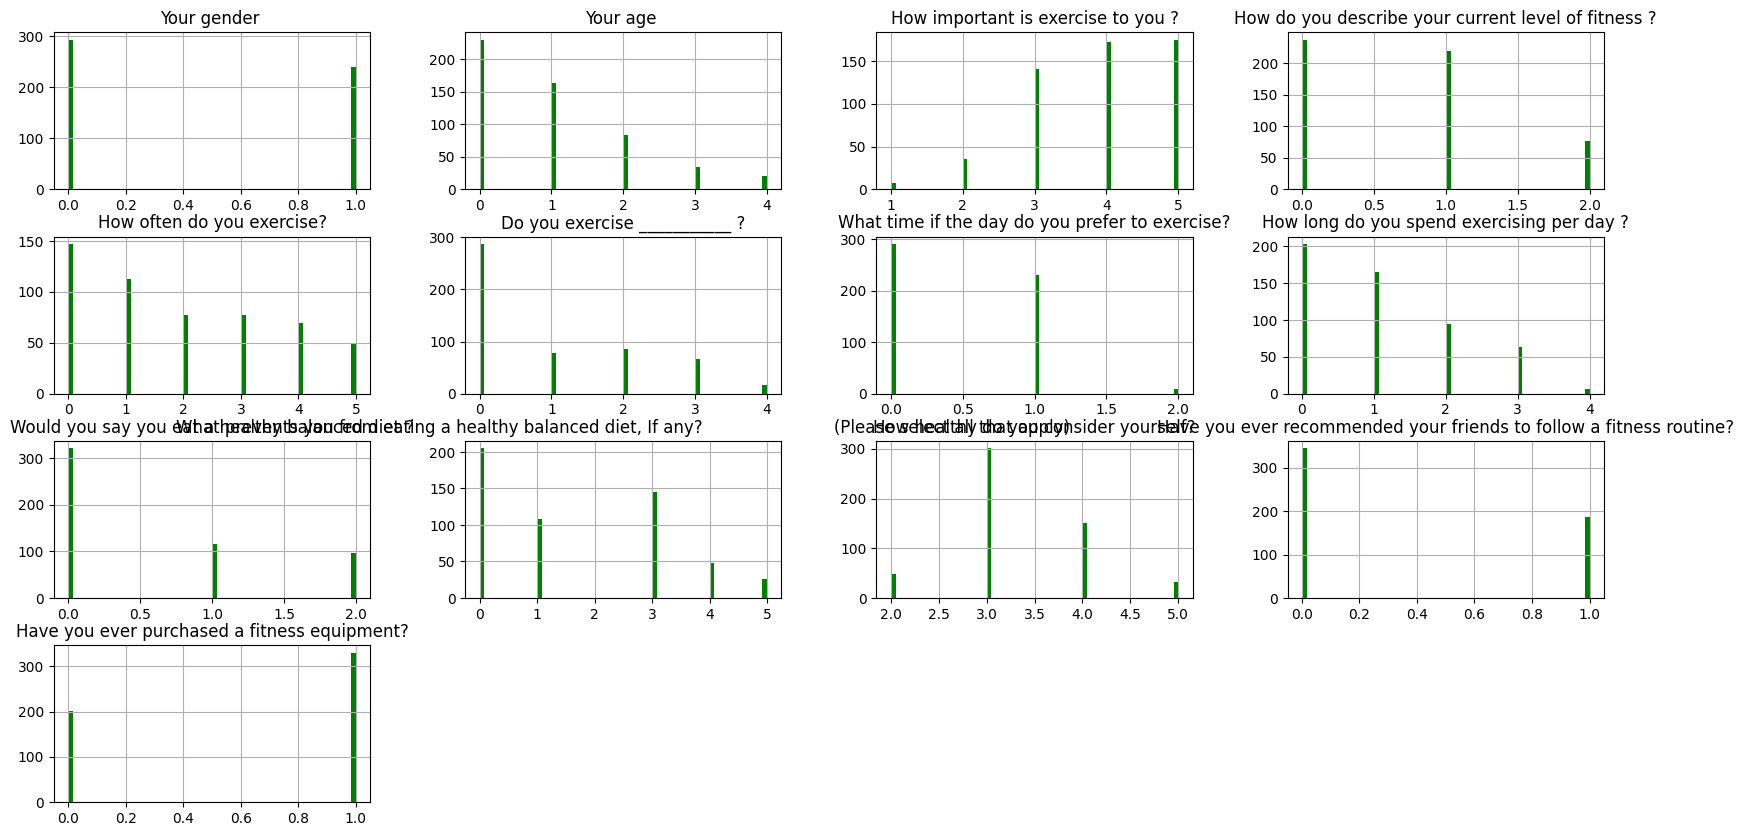

In [346]:
fitness2_4.hist(bins=60, figsize=(20,10), color='green')
plt.show()

In [347]:
x = fitness2_4.drop(['How do you describe your current level of fitness ?'], axis=1)
y = fitness2_4['How do you describe your current level of fitness ?']
#X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

## 6.2  Modeling & Evaluation

### 6.2.1   Decision Tree

Decision Tree is a supervised algorithm that uses a tree like model of decisions. This algorithm uses various methods to split the data and choose the best split. In this case, it is used a Gini criterion, that means it is gonna be splited every column based on the objective column and the model is gonna choose the split with the lowest Gini score.

In [348]:
#dt = DecisionTreeClassifier(criterion='gini',splitter='best')
#dt = DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=3)
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
max_features=None, max_leaf_nodes=None,
min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.0,
random_state=None, splitter='best')
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [349]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [350]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: {:d}%'.format(int(accuracy * 100)))

Accuracy: 59%


### 6.2.2  Performance Evaluation

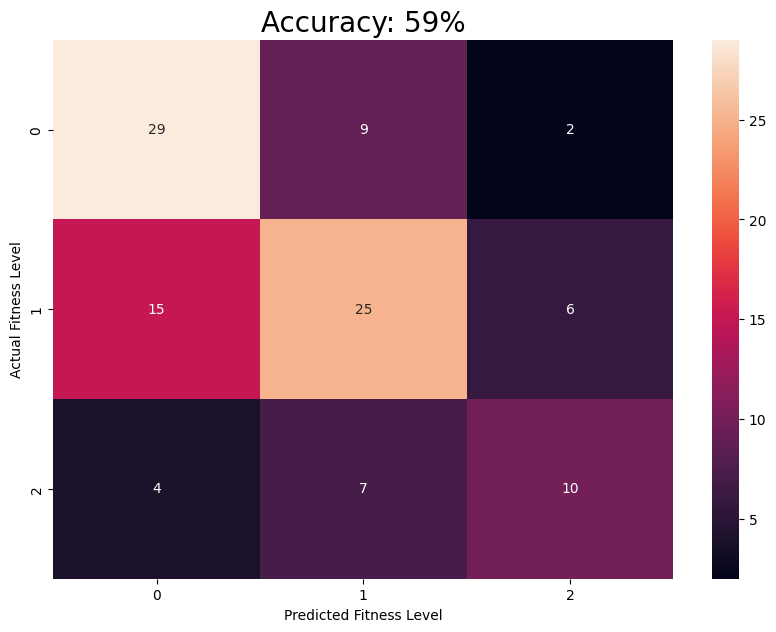

In [351]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.xlabel('Predicted Fitness Level')
plt.ylabel('Actual Fitness Level')
plt.title('Accuracy: {:d}%'.format(int(accuracy * 100)), size = 20)
plt.show()

As a metric it is used **accuracy** and a **confusion matrix** with the changes on the fitness level column, our target column. <br>

A slightly higher accuracy was obtained than in the previous case (60% > 57%). This means that the changes applied and the new model used have helped the AI to work better and to obtain better results.

Comparing this confusion matrix with the previous one, it can be seen that it still confuses levels 0 and 1, but this time in a less exaggerated way. In addition, with respect to level 2, a greater number of successes have been obtained and the failures are milder.

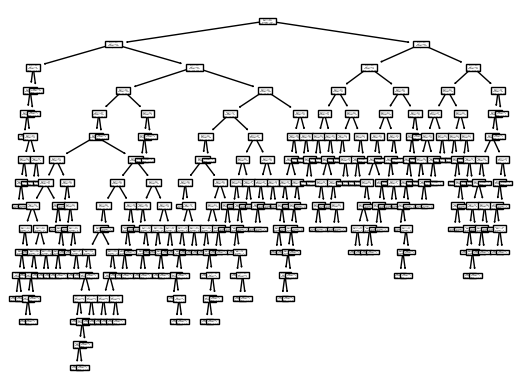

In [352]:
tree.plot_tree(dt)
plt.show()

Here it can be seen a preview of the complete decision tree. The content of the nodes can not be appreciated, but this way we can make sure that the model works as intended: making multiple decisions until reaching a final node.

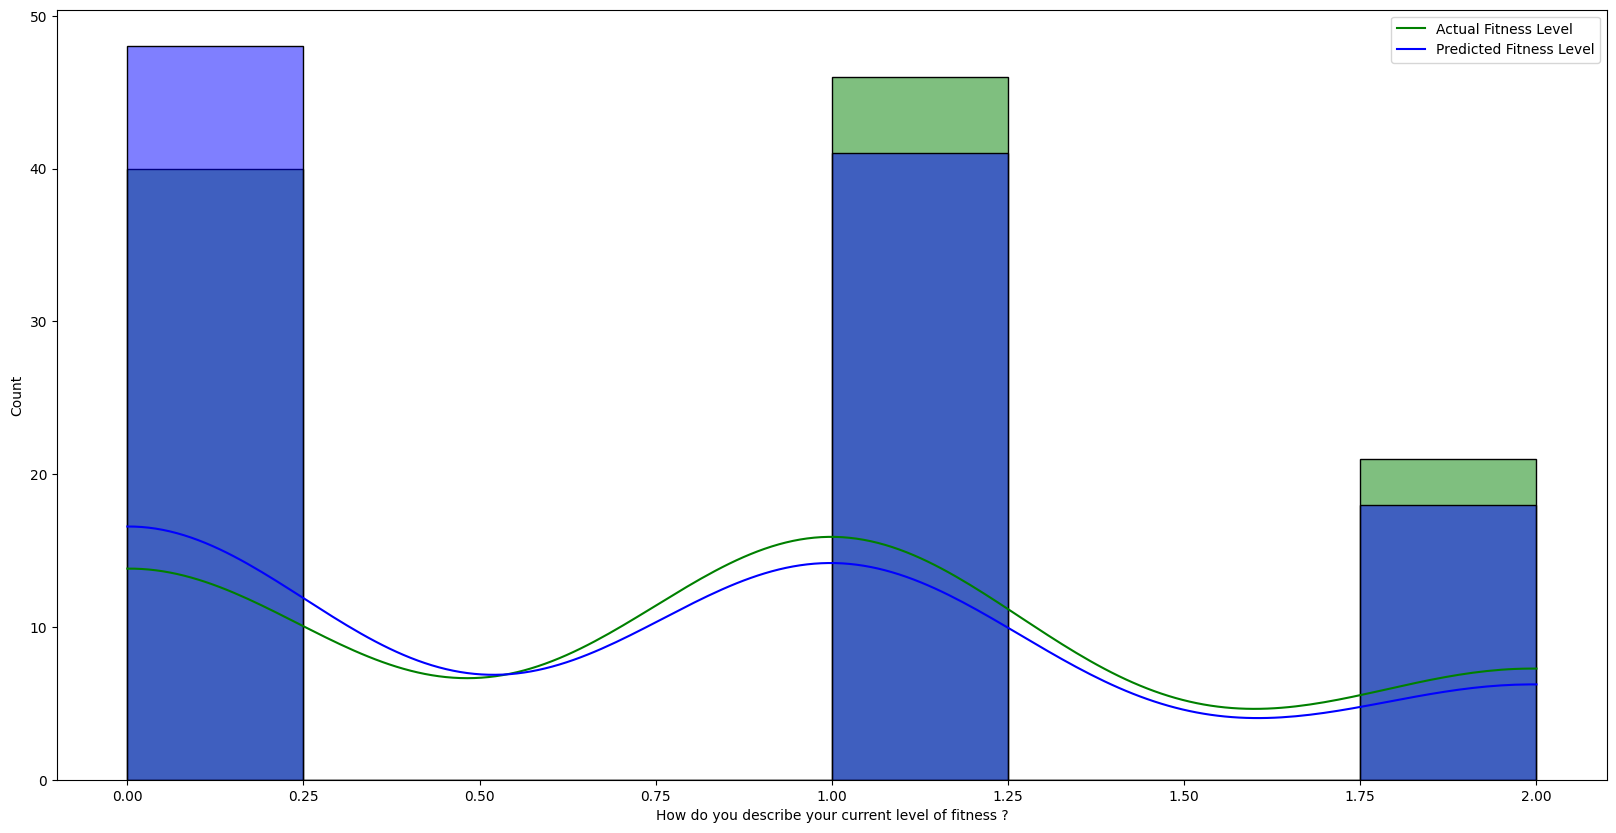

In [353]:
plt.figure(figsize=(20,10))
sns.histplot(data = y_test, kde = True, color='g')
sns.histplot(data = y_pred, kde = True, color='b')
plt.legend(labels=["Actual Fitness Level","Predicted Fitness Level"])

Compared to the previous graph, the answers given by the model are much closer to the correct answers.

### 6.3  Following Iteration


Considering that there has been an improvement in the results, the modifications to the dataset will be maintained in the next iteration. In addition, new changes will be applied that require a more exhaustive study of the columns.

On the other hand, the model used is also very important and Random Forest will be applied on this occasion. It is a more powerful technique that involves the use of the Decision Tree in it.

# 7.    Third Iteration

## 7.1  Data Preparation

### 7.1.1   Drop columns with open answers

As in the previous iteration, columns with open-ended answers are removed as there is no way to use this information.

In [354]:
fitness3_1 = fitness_mod.copy(deep = True)

fitness3_1 = fitness3_1.drop(['Timestamp'], axis=1)
fitness3_1 = fitness3_1.drop(['Your name '], axis=1)

### 7.1.2   Treat columns with multiple answers

As in the previous iteration, all columns with multiple answers will be droped except `What prevents you from eating a healthy balanced diet, If any?`, it will bee adapted for the model.

In [355]:
#fitness1_2 = fitness1_2.drop(['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'], axis=1)

fitness3_2 = fitness3_1.copy(deep = True)

fitness3_2 = fitness3_2.drop(['What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)'], axis=1)
fitness3_2 = fitness3_2.drop(['What form(s) of exercise do you currently participate in ?                        (Please select all that apply)'], axis=1)
fitness3_2 = fitness3_2.drop(['What motivates you to exercise?         (Please select all that applies )'], axis=1)

In [356]:
fitness3_2 = fitness3_2.replace({'What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)': 
{"Temptation and cravings": 0,
 "Lack of time": 1,
  "Ease of access to fast food;Temptation and cravings": 3,
  "Ease of access to fast food": 3,
  "I have a balanced diet": 4,
  "Lack of time;Temptation and cravings": 1,
  "Cost": 5,
  "Lack of time;Ease of access to fast food;Temptation and cravings": 3,
  "Lack of time;Ease of access to fast food": 1,
  "Cost;Ease of access to fast food": 5,
  "Lack of time;Cost": 5,
  "Cost;Ease of access to fast food;Temptation and cravings": 3,
  "Lack of time;Cost;Ease of access to fast food;Temptation and cravings": 3,
  "Cost;Temptation and cravings": 5,
  "Ease of access to fast food;I have a balanced diet": 4,
  "I do not measure. I can't say for sure if my diet is balanced. ": 3,
  "Alcohol does me a good diet": 4,
  "Lack of time;Cost;Temptation and cravings": 3,
  "Rarely eat fast food": 4,
  "Temptation and cravings;I have a balanced diet": 4,
  "i don't have a proper diet": 3,
  "Social circle ": 4
  }})

fitness2_2['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'].value_counts()

0    210
3    149
1    112
4     48
5     26
Name: What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply), dtype: int64

### 7.1.3   Group similar answers

A new feature of this iteration is that, as was done with the target question at the beginning, the columns will be simplified by grouping similar answers into the same numerical value.

After several tests, it has been shown that this change is not very relevant, but finally improvements in the results have been obtained by simplifying the column `How long do you spend exercising per day`. Specifically, the answers "30 minutes" and "1 hour" were grouped together.

In [357]:
fitness3_3 = fitness3_2.copy(deep = True)

# "30 minutes" and "1 hour"
fitness3_3 = fitness3_3.replace({'How long do you spend exercising per day ?': 
{"30 minutes": 0,
"1 hour": 0, 
"I don't really exercise": 2, 
"2 hours": 3, 
"3 hours and above": 4}})


### 7.1.4   Change every string value to integer value

As in the previous iteration, those columns with string answers and not yet processed replace their values by numeric values.

In [358]:
# "4. How important is an exercise to you on the scale of 1 to 5" with integer values
# "14. How healthy do you consider yourself on a scale of 1 to 5?" with integer values
# "5. How do you describe your current level of fitness?" replaced at the top of the project

fitness3_4 = fitness3_3.copy(deep = True)

fitness3_4 = fitness3_4.replace({'Your gender ': 
{"Female": 0,
"Male": 1}})

fitness3_4 = fitness3_4.replace({'Your age ': 
{"19 to 25": 0,
"15 to 18": 1,
"40 and above": 2,
"30 to 40": 3,
"26 to 30": 4}})

fitness3_4 = fitness3_4.replace({'How often do you exercise?': 
{"1 to 2 times a week": 0,
"Never": 1,
"2 to 3 times a week": 2,
"3 to 4 times a week": 3,
"Everyday": 4,
"5 to 6 times a week": 5}})

fitness3_4 = fitness3_4.replace({'Do you exercise ___________ ?': 
{"Alone": 0,
"I don't really exercise": 1,
"With a friend": 2,
"With a group": 3,
"Within a class environment": 4}})

fitness3_4 = fitness3_4.replace({'What time if the day do you prefer to exercise?': 
{"Early morning": 0,
"Evening": 1,
"Afternoon": 2}})

fitness3_4 = fitness3_4.replace({'Would you say you eat a healthy balanced diet ?': 
{"Not always": 0,
"Yes": 1,
"No": 2 }})

fitness3_4 = fitness3_4.replace({'Have you ever recommended your friends to follow a fitness routine?': 
{"Yes": 0,
"No": 1}})

fitness3_4 = fitness3_4.replace({'Have you ever purchased a fitness equipment?': 
{"Yes": 0,
"No": 1}})

### 7.1.5   Drop irrelevant columns

Some columns has a very low correlation with the target column. That means that there might be some features irrelevants for the prediction of the answers (may even have a negative impact on the model).

In [359]:
fitness3_5 = fitness3_4.copy(deep = True)

C:\Users\ruben\AppData\Local\Temp\ipykernel_26144\2065487765.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat,dtype = np.bool)


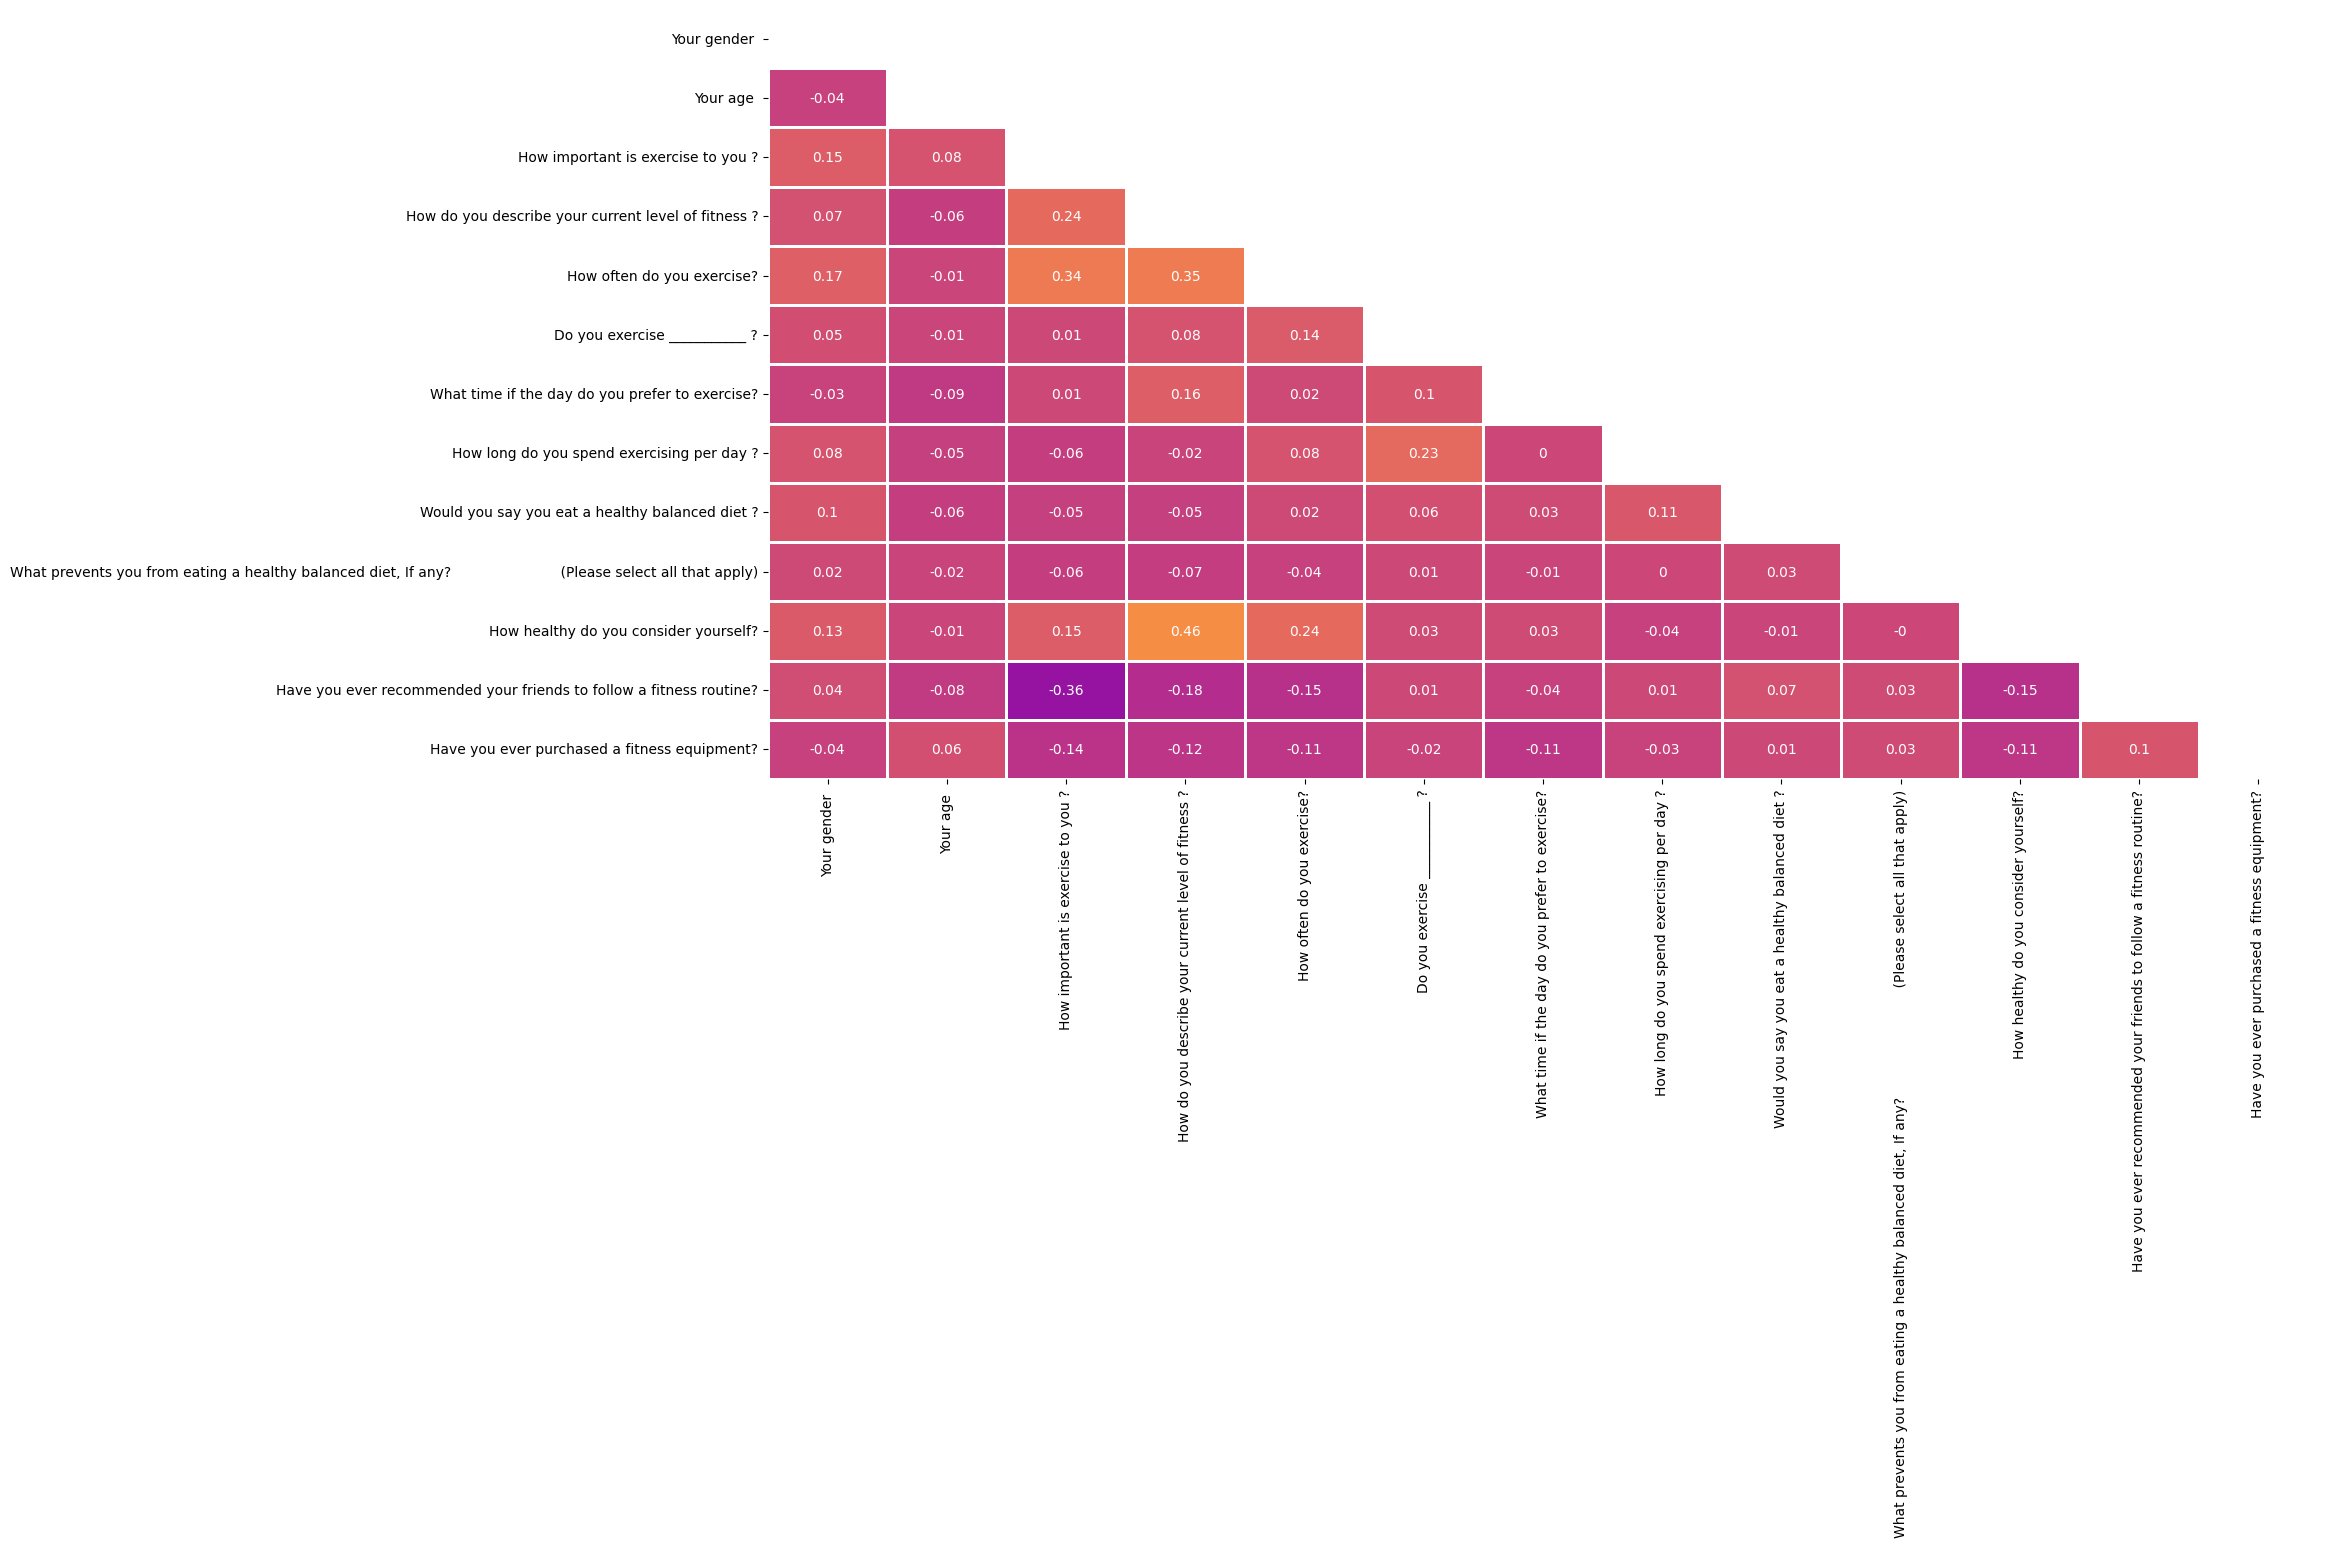

In [360]:
corr_mat = fitness3_5.corr().round(2)
plt.subplots(figsize = (20,10))
mask = np.zeros_like(corr_mat,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat,mask = mask,vmin = -1,vmax = 1,center = 0, cmap = 'plasma',square = False,lw = 2,annot = True,cbar = False)
plt.show() 

This figure shows the correlation of the different columns with each other. The closer the correlation is to 1 or -1, the better the linear relationship, directly or inverseley proportional. For example, it is clear that features such as `How healthy do you consider yourself?` and `How do you describe your current level of fitness?` have a very high relationship, of 0.46, so that the data dispersion between them will be smaller. The scheme can be helpful when considering different hypotheses comparing different features.

In [361]:
# Low correlation
fitness3_5 = fitness3_5.drop(['How long do you spend exercising per day ?'], axis=1)

After several tests, it has been verefied that if the column `How long do you spend exercising per day ?` is droped, the model achieves a better accuracy in the test process. The correlation with the target column is almost zero (-0,2), so It is normal that removing the column will achieve better results.

### 7.1.6   Outliers treatment

As in the previous iteration, the Interquartile Range (IQR) method has been applied to remove some outliers of the dataset, where it is based on the position of the quartiles, at 25% and 75%.

In [362]:
fitness3_6 = fitness3_5.copy(deep = True)

In [363]:
fitness3_6_pc = fitness3_6.copy(deep = True)
Q1 = fitness3_6_pc.quantile(0.25) # 0.25
Q3 = fitness3_6_pc.quantile(0.75) # 0.75
IQR = Q3 - Q1
print(IQR)

Your gender                                                                                                              1.0
Your age                                                                                                                 2.0
How important is exercise to you ?                                                                                       2.0
How do you describe your current level of fitness ?                                                                      1.0
How often do you exercise?                                                                                               3.0
Do you exercise ___________ ?                                                                                            2.0
What time if the day do you prefer to exercise?                                                                          1.0
Would you say you eat a healthy balanced diet ?                                                                          1.0


In [364]:
fitness3_6_pc_out = fitness3_6_pc[~((fitness3_6_pc < (Q1 - 1.5 * IQR)) |(fitness3_6_pc > (Q3 + 1.5 * IQR))).any(axis=1)]

In [365]:
i, _ = fitness3_6.shape
o, _ = fitness3_6_pc_out.shape
print("Removed", i-o,"rows")
print("Rows count reduced from", i, "to", o,"resulting in", int((o/i)*100), "% of the initial rows" )

Removed 13 rows
Rows count reduced from 545 to 532 resulting in 97 % of the initial rows


In [366]:
fitness3_6 = fitness3_6_pc_out.copy(deep = True)

### 7.1.7   Train-test Split

As in the previous case, it is sepparated the dataframe in 4 dataframes, two for train and two for test. The test dataset has a 20% of the rows of the original dataset and the train dataset a 80% of them.

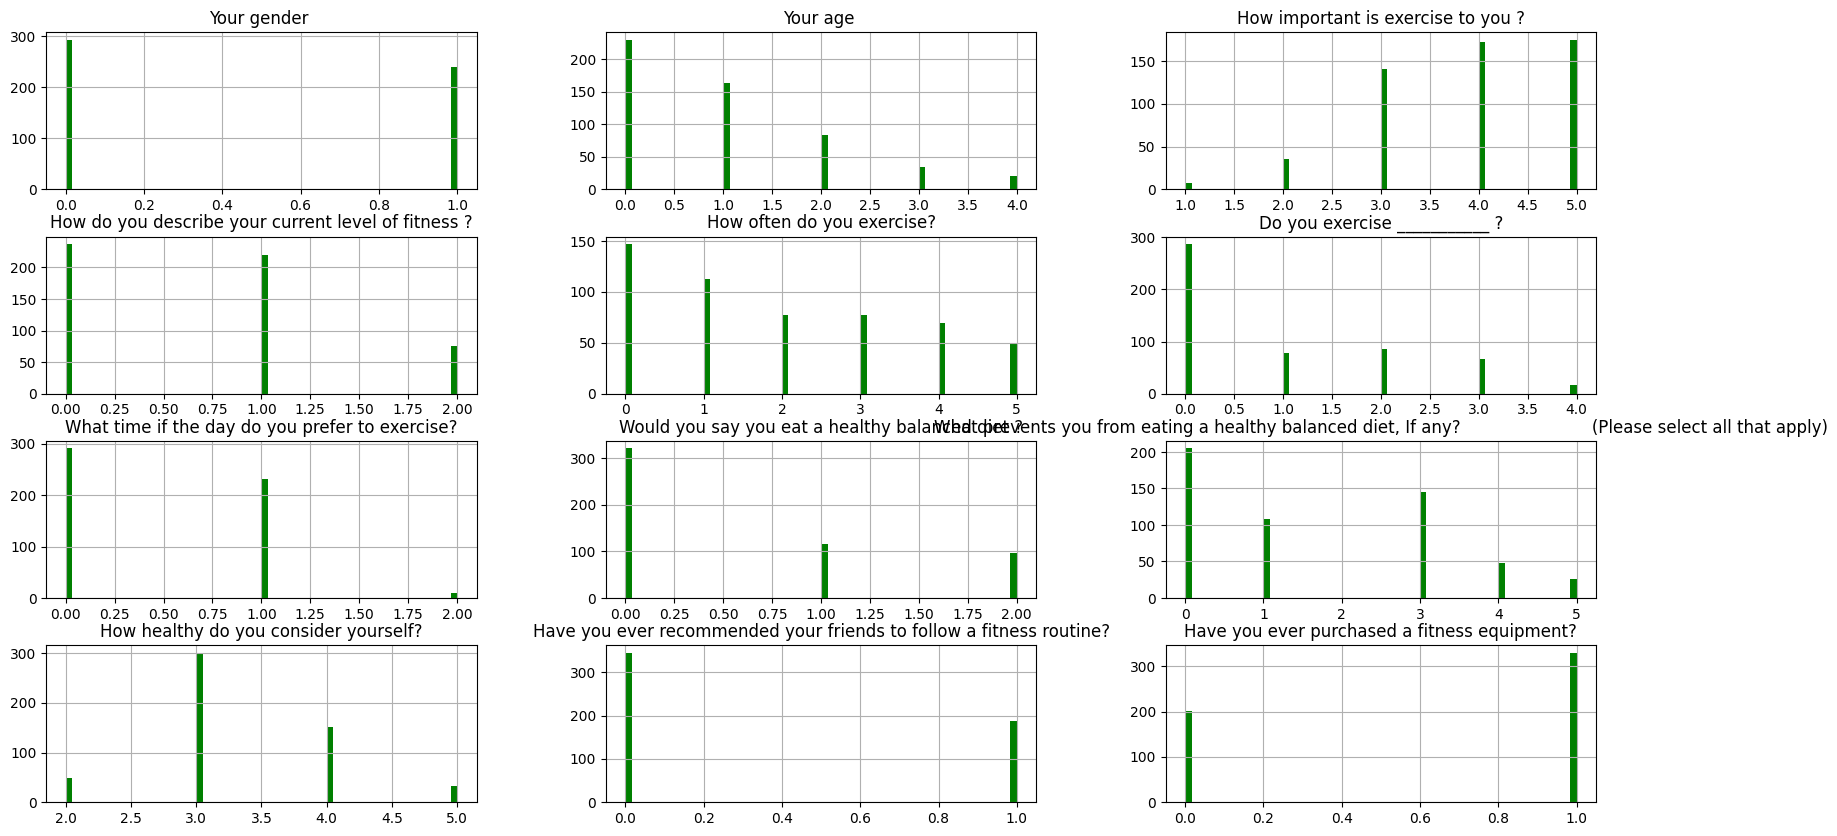

In [367]:
fitness3_6.hist(bins=60, figsize=(20,10), color='green')
plt.show()

In [368]:
x = fitness3_6.drop(['How do you describe your current level of fitness ?'], axis=1)
y = fitness3_6['How do you describe your current level of fitness ?']
#X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

## 7.2  Modeling & Evaluation

### 7.2.1   Random Forest

Random forests is combination of decision trees. The model creates a set of decision trees where it chooses randomly the columns to be split. The predictions are made with the most frequent observation among all the trees.

In [369]:
#rfc = RandomForestClassifier(n_estimators = 100, max_features = 'sqrt', max_depth= 200, bootstrap=False, random_state=0) 
rfc = RandomForestClassifier(n_estimators=1000, random_state=0)
print(rfc.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [370]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [371]:
y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print('Accuracy: {:d}%'.format(int(accuracy_rfc * 100)))

Accuracy: 68%


### 7.2.2  Performance Evaluation

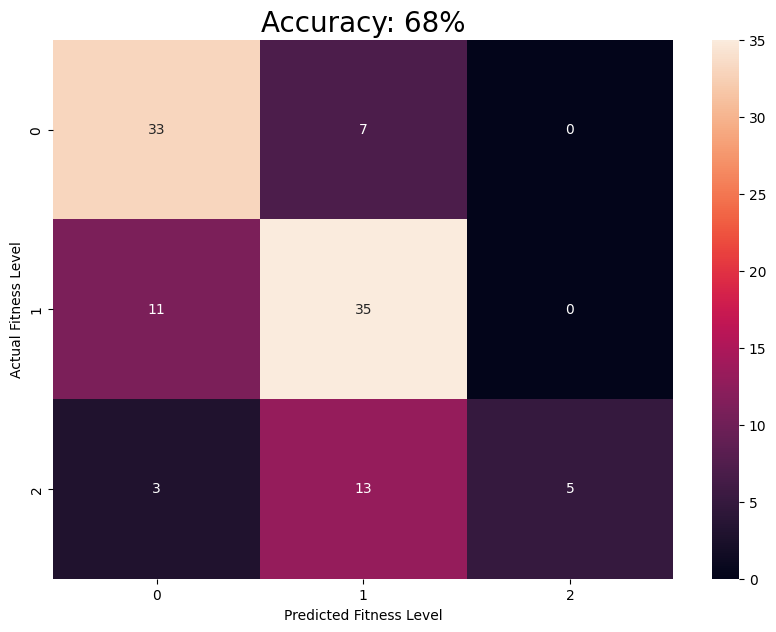

In [372]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt=".0f")
plt.xlabel('Predicted Fitness Level')
plt.ylabel('Actual Fitness Level')
plt.title('Accuracy: {:d}%'.format(int(accuracy_rfc * 100)), size = 20)
plt.show()

As a metric it is used **accuracy** and a **confusion matrix** with the changes on the fitness level column, our target column. <br>

It has been obtained a better accuracy than in the previous iteration (68% > 60%), and the confusion matrix diagonal is more prominent. The model used seems to fit the problem better, and the data preparation has been a little deeper. The confusion matrix shows that there are fewer wrong predictions and, as suggested by the data, fitness level 1 has a higher number of correct predictions. 

[Text(0.4086945564516129, 0.9705882352941176, 'X[2] <= 3.5\ngini = 0.606\nsamples = 265\nvalue = [204, 161, 60]'),
 Text(0.1028225806451613, 0.9117647058823529, 'X[1] <= 2.5\ngini = 0.493\nsamples = 89\nvalue = [90, 36, 11]'),
 Text(0.09637096774193549, 0.8529411764705882, 'X[8] <= 2.5\ngini = 0.522\nsamples = 79\nvalue = [77, 36, 11]'),
 Text(0.025806451612903226, 0.7941176470588235, 'X[9] <= 0.5\ngini = 0.227\nsamples = 12\nvalue = [14, 1, 1]'),
 Text(0.012903225806451613, 0.7352941176470589, 'X[4] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.0064516129032258064, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.01935483870967742, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.03870967741935484, 0.7352941176470589, 'X[2] <= 2.5\ngini = 0.133\nsamples = 10\nvalue = [13, 0, 1]'),
 Text(0.03225806451612903, 0.6764705882352942, 'X[7] <= 1.5\ngini = 0.278\nsamples = 4\nvalue = [5, 0, 1]'),
 Text(0.025806451612903226, 0.

<Figure size 1500x1000 with 0 Axes>

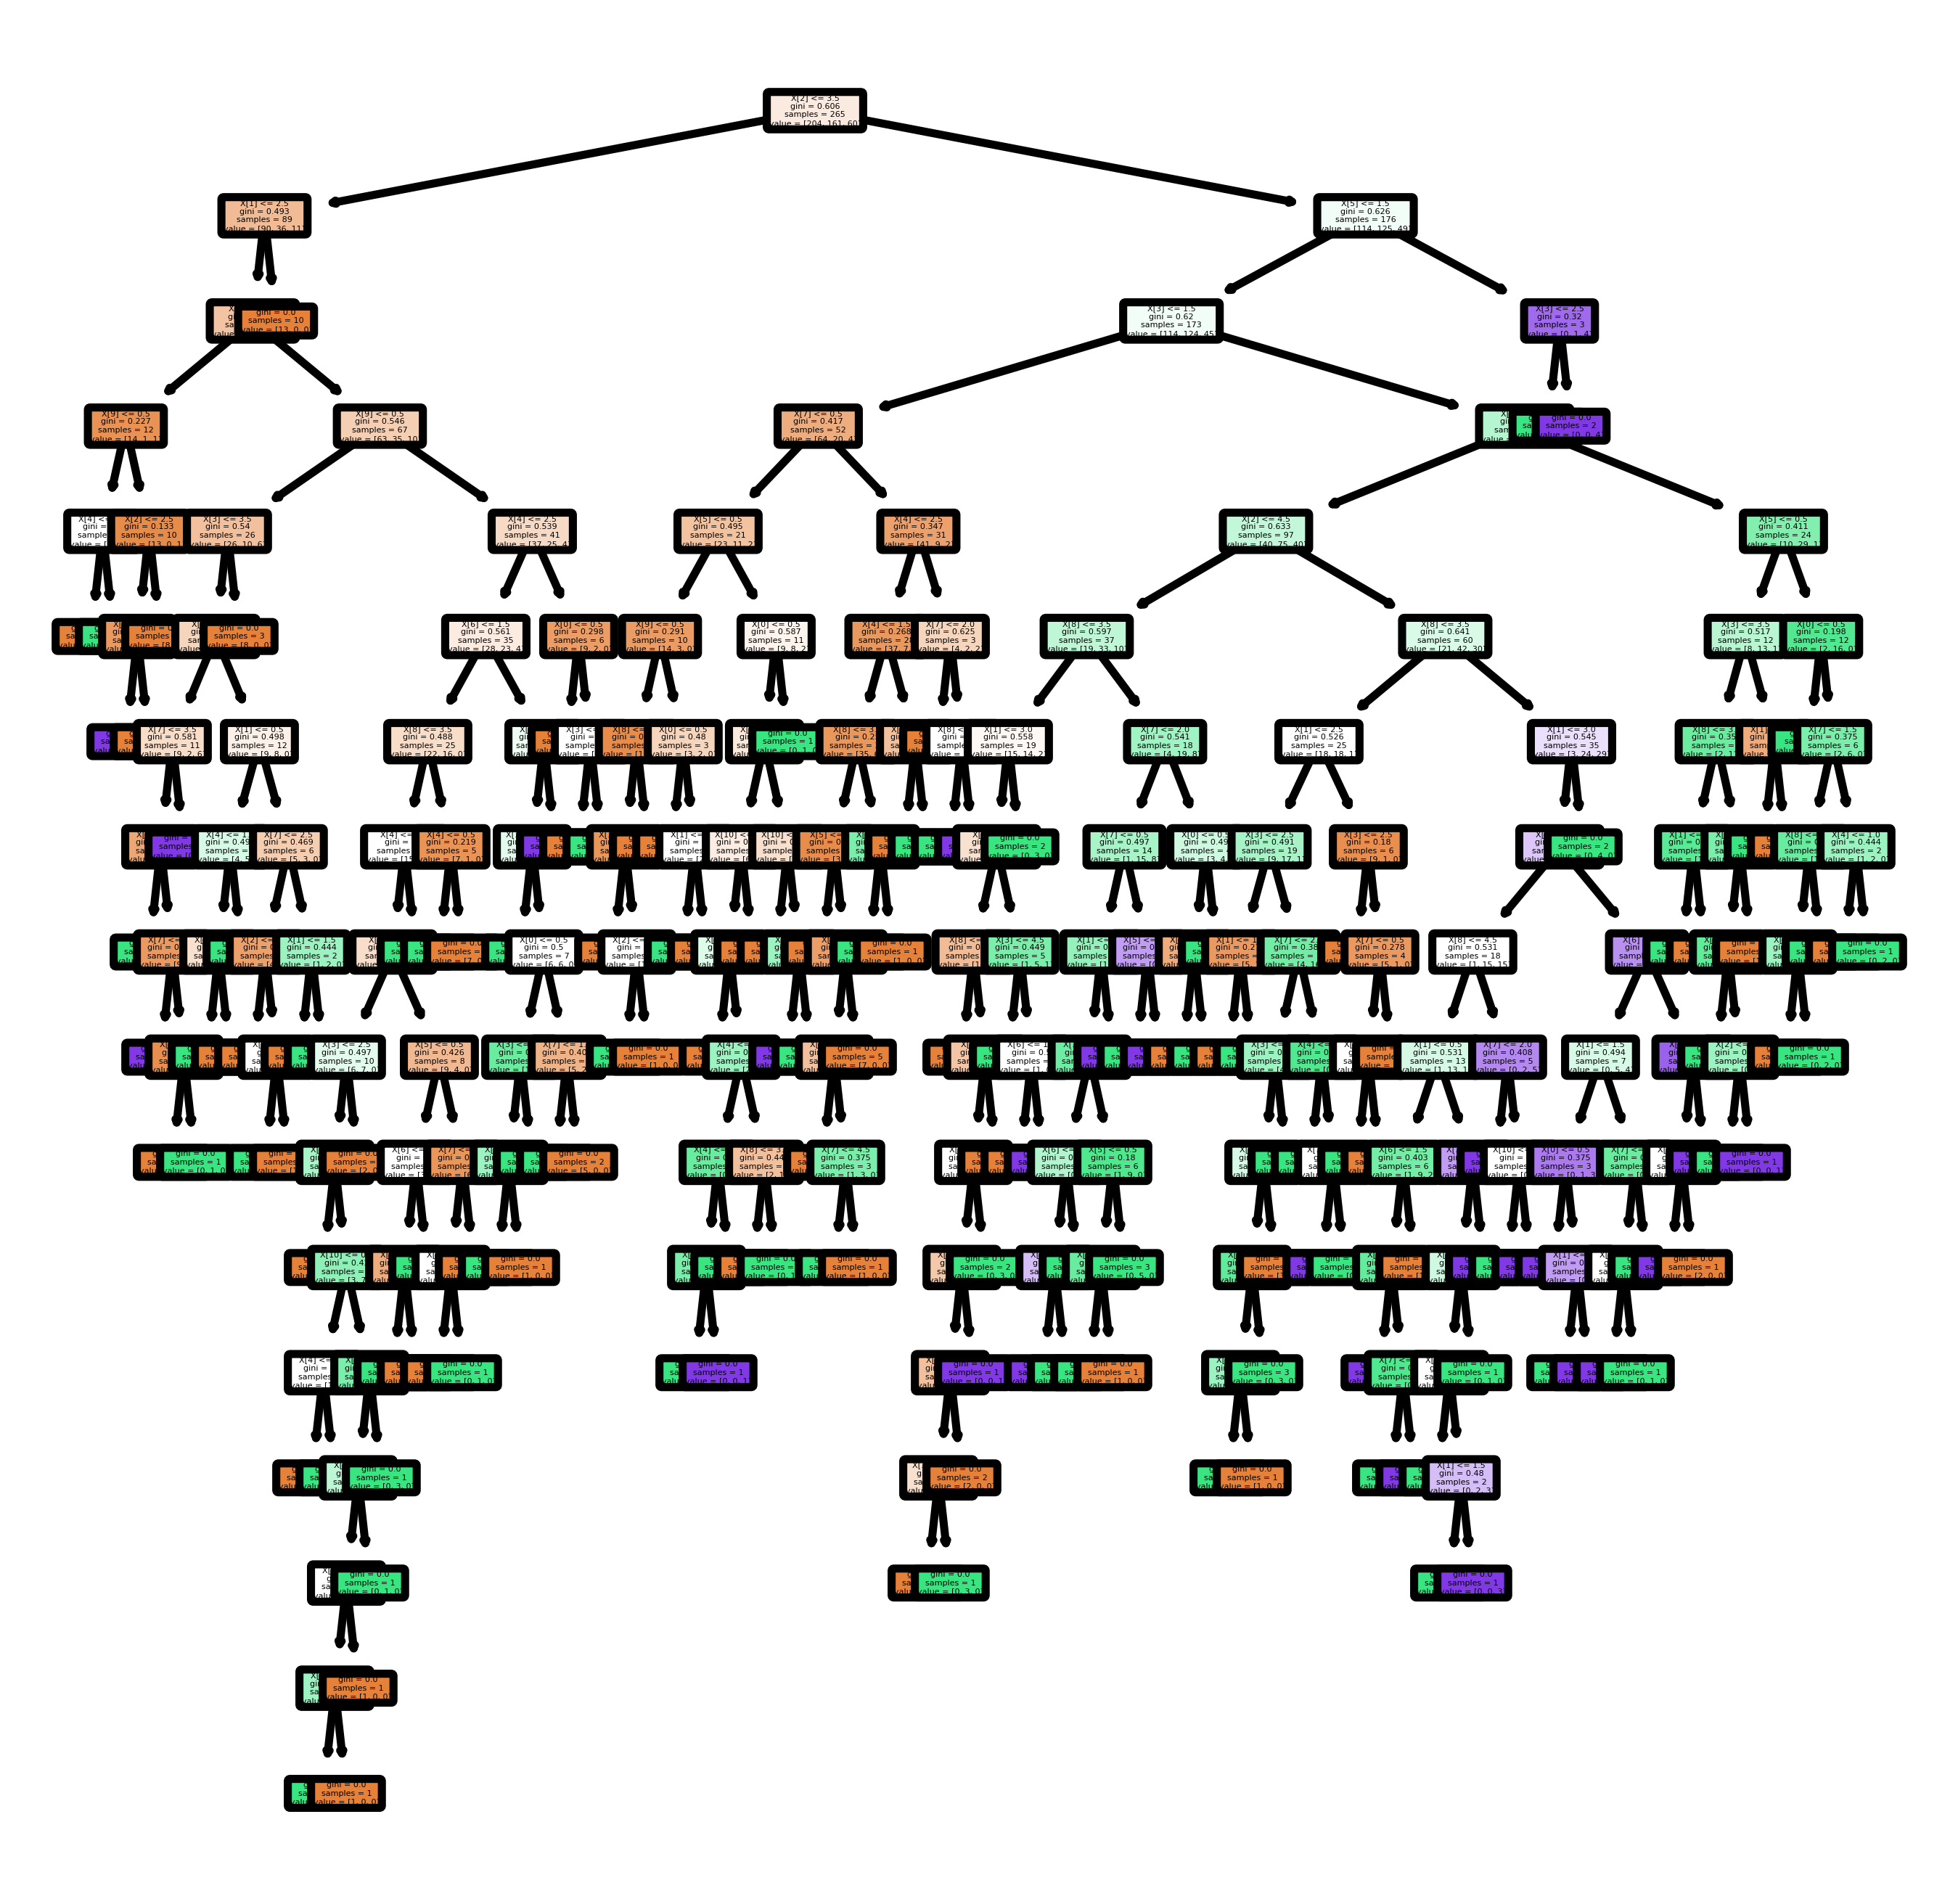

In [373]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(rfc.estimators_[0],  
          filled=True, impurity=True, 
          rounded=True)

Here is how the random forest model looks. Similar to the Decision Tree model, the goal is make multiple decisions until reaching a final node.

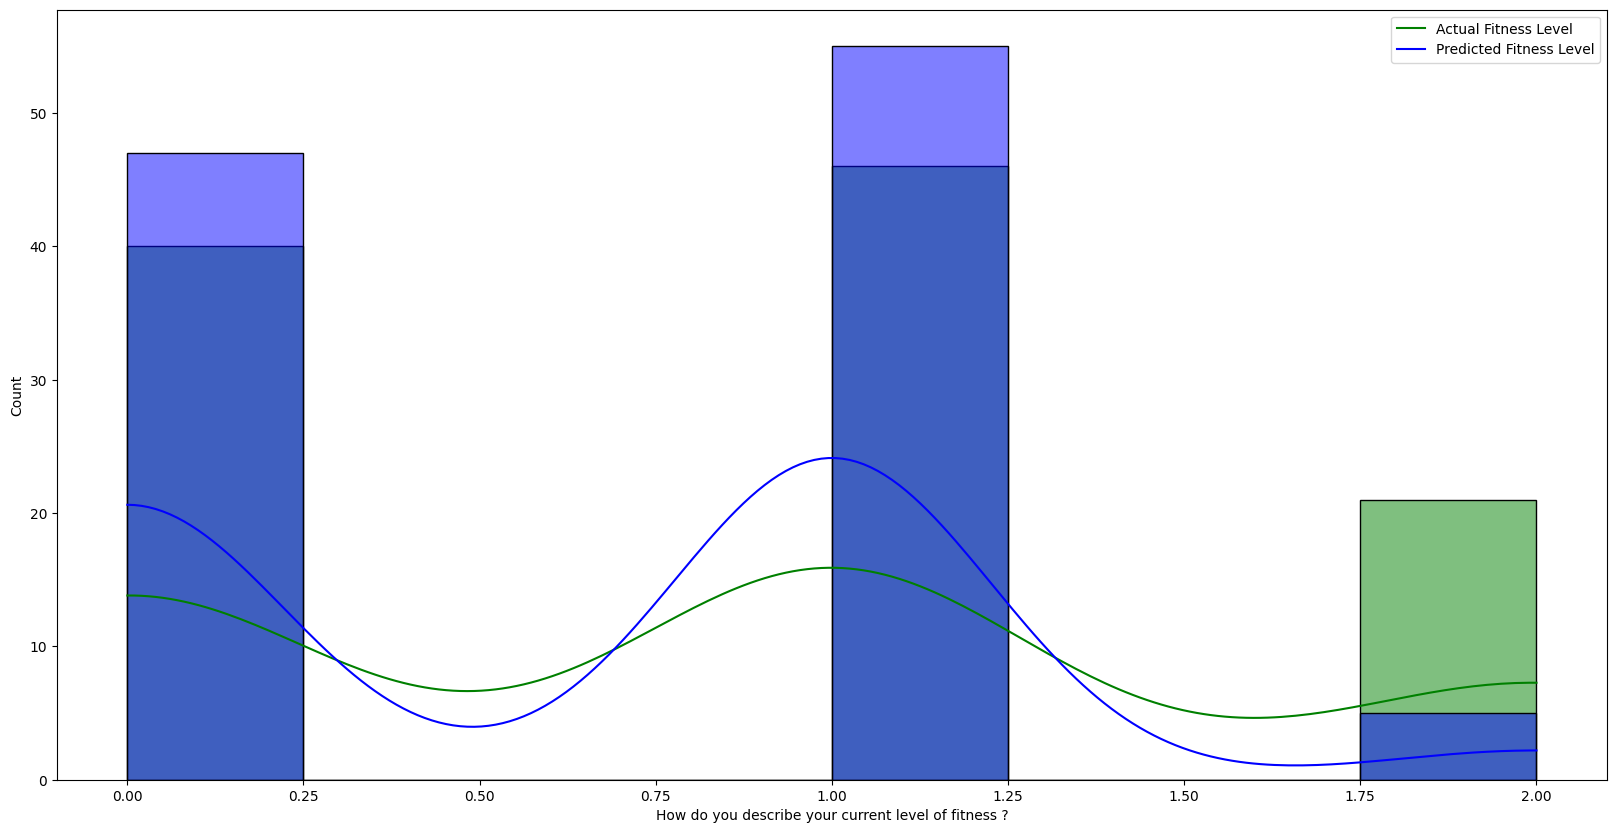

In [374]:
plt.figure(figsize=(20,10))
sns.histplot(data = y_test, kde = True, color='g')
sns.histplot(data = y_pred_rfc, kde = True, color='b')
plt.legend(labels=["Actual Fitness Level","Predicted Fitness Level"])

The graph shows the behaviour of the model comparing the correct answers with those given by the AI.

# 8. Conclusions

The Random Forest model, despite not having a perfect  diagonal in the confusion matrix, it is the best model for our problem. Finaly it is obtained a program that can predict the fitness level of an user based on the anwsers of other questions.

This project has allowed us to understand the whole process involved in working with a dataset and predicting its values. The column study has helped us to get to know the dataset in depth and to study its content. We have obtained conclusions that have evidently helped us to carry out the data preparation process. On the other hand, working with different models has made us realise how complicated it can be to achieve a good result and the factors that have to be taken into account.

In particular, despite the fact that this dataset is not very well distributed, good results have been obtained and the models work correctly. We have tried many combinations of data preparation and finally we have shown the most efficient and suitable changes for the dataset.

In summary, the level of knowledge of machine learning has increased thanks to the demands of this practice and the work involved in carrying it out. Also, working in a team has allowed us to share the work among us, discuss the decisions made and reach conclusions by helping each other. In addition, the abundant documentation available and the generosity of the teacher have allowed a continuous evolution and have made the development of the practical possible. 